# KDDCUP Data Analyze

2017-5-8

## 平均时间 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,date,time
import copy

In [2]:
%matplotlib inline

In [3]:
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/training_20min_avg_travel_time.csv'
raw_data = pd.read_csv(in_file_path)
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/weather (table 7)_training_update.csv'
weather_data = pd.read_csv(in_file_path)

### 裁剪数据（travel_time只留一个月）

In [4]:
raw_data['date'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:], '%Y-%m-%d %H:%M:%S').date())

In [5]:
start_date = date(2016,9,19)
raw_data = raw_data[raw_data['date'] >= start_date]

### 分析天气数据 

In [5]:
weather_data.columns

Index(['date', 'hour', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation'],
      dtype='object')

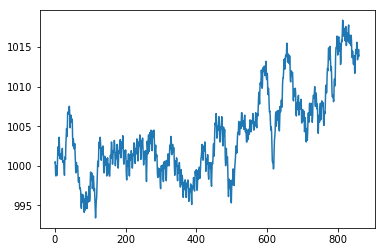

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['pressure'])),weather_data['pressure'])

In [33]:
weather_data['pressure'].describe()

count    7758.000000
mean     1003.989675
std         5.446395
min       993.400000
25%      1000.000000
50%      1002.750000
75%      1007.000000
max      1018.400000
Name: pressure, dtype: float64

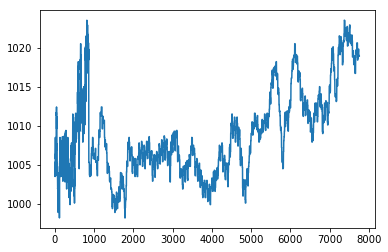

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['sea_pressure'])),weather_data['sea_pressure'])

In [35]:
weather_data['sea_pressure'].describe()

count    7758.000000
mean     1008.866937
std         5.528610
min       998.200000
25%      1004.800000
50%      1007.550000
75%      1011.900000
max      1023.500000
Name: sea_pressure, dtype: float64

/home/godcedric/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


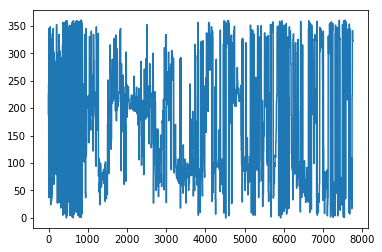

In [39]:
wind_direction = weather_data['wind_direction']
wind_direction[wind_direction > 360] = np.nan
wind_direction.fillna(method='ffill', inplace=True)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['wind_direction'])),weather_data['wind_direction'])

In [41]:
weather_data['wind_direction'].describe()

count    7758.000000
mean      179.973318
std       111.947228
min         0.000000
25%        81.000000
50%       187.500000
75%       291.000000
max       360.000000
Name: wind_direction, dtype: float64

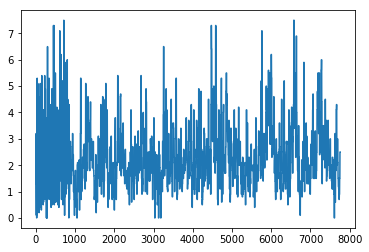

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['wind_speed'])),weather_data['wind_speed'])

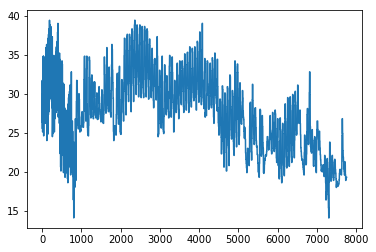

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['temperature'])),weather_data['temperature'])

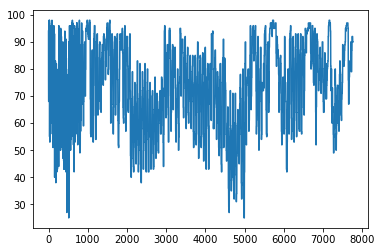

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['rel_humidity'])),weather_data['rel_humidity'])

In [47]:
weather_data['precipitation']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      1.0
11     10.2
12      0.2
13      0.0
14      0.0
15      0.0
16      0.0
17      0.1
18      0.0
19      0.1
20      0.0
21      0.1
22      0.4
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
858     0.0
858     0.0
858     0.0
858     0.0
858     0.0
858     0.0
859     0.0
859     0.0
859     0.0
859     0.0
859     0.0
859     0.0
859     0.0
859     0.0
860     0.0
860     0.0
860     0.0
860     0.0
860     0.0
860     0.0
860     0.0
860     0.0
861     0.0
861     0.0
861     0.0
861     0.0
861     0.0
861     0.0
861     0.0
861     0.0
Name: precipitation, dtype: float64

In [49]:
plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(np.arange(len(weather_data['precipitation'])),weather_data['precipitation'])

### 补充特征 

In [6]:
raw_data['start_time'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
weather_data['date'] = weather_data['date'].astype(str)

In [7]:
weather_data['date'] = weather_data['date'].astype(str)
weather_data['hour'] = weather_data['hour'].map(lambda x: ' ' + time(x,0,0).strftime('%H:%M:%S'))
weather_data['start_time'] = weather_data['date'] + weather_data['hour']
weather_data['start_time'] = weather_data['start_time'].map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [8]:
num = len(weather_data)
for i in range(num):  
    temp = weather_data.ix[i]
    temp1 = copy.deepcopy(temp);temp2 = copy.deepcopy(temp);temp3 = copy.deepcopy(temp);temp4 = copy.deepcopy(temp)
    temp5 = copy.deepcopy(temp);temp6 = copy.deepcopy(temp);temp7 = copy.deepcopy(temp);temp8 = copy.deepcopy(temp)
    stime = temp.start_time
    temp1.start_time = stime + timedelta(minutes=20)
    temp2.start_time = stime + timedelta(minutes=40)
    temp3.start_time = stime + timedelta(minutes=60)
    temp4.start_time = stime + timedelta(minutes=80)
    temp5.start_time = stime + timedelta(minutes=100)
    temp6.start_time = stime + timedelta(minutes=120)
    temp7.start_time = stime + timedelta(minutes=140)
    temp8.start_time = stime + timedelta(minutes=160)
    alltemp = [temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
    alltemp = pd.DataFrame(alltemp)
    weather_data = pd.concat([weather_data,alltemp])

In [12]:
process_data = pd.merge(raw_data, weather_data, on=['start_time', 'date'], how='left')

In [13]:
process_data.columns

Index(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time',
       'date', 'start_time', 'hour', 'pressure', 'sea_pressure',
       'wind_direction', 'wind_speed', 'temperature', 'rel_humidity',
       'precipitation'],
      dtype='object')

In [14]:
process_data['weekday'] = process_data['start_time'].map(lambda x: x.weekday())
process_data['route'] = process_data['intersection_id'].astype(str) + '-' + process_data['tollgate_id'].astype(str)

In [15]:
# 增加前20分钟平均时间特征
start_time = process_data['start_time']
avg_travel_time = process_data['avg_travel_time']
last_20min = process_data['avg_travel_time'].copy() 
last_40min = process_data['avg_travel_time'].copy()
last_60min = process_data['avg_travel_time'].copy()
last_80min = process_data['avg_travel_time'].copy()
last_100min = process_data['avg_travel_time'].copy()
last_120min = process_data['avg_travel_time'].copy()
last_20min[:] = np.nan
last_40min[:] = np.nan
last_60min[:] = np.nan
last_80min[:] = np.nan
last_100min[:] = np.nan
last_120min[:] = np.nan
for i in range(len(start_time)):
    cur_time = start_time[i] #当前时间
    # 前20min
    if (i-1) >= 0:
        last20 = cur_time - timedelta(minutes=20)
        if last20 == start_time[i-1]:
            last_20min[i] = avg_travel_time[i-1]
    # 前40min
    if (i-2) >= 0:
        last40 = cur_time - timedelta(minutes=40)
        for j in range(2):
            if last40 == start_time[i-j-1]:
                last_40min[i] = avg_travel_time[i-j-1]
                break
    # 前60min
    if (i-3) >= 0:
        last60 = cur_time - timedelta(minutes=60)
        for j in range(3):
            if last60 == start_time[i-j-1]:
                last_60min[i] = avg_travel_time[i-j-1]
                break
    # 前80min
    if (i-4) >= 0:
        last80 = cur_time - timedelta(minutes=80)
        for j in range(4):
            if last80 == start_time[i-j-1]:
                last_80min[i] = avg_travel_time[i-j-1]
                break
    # 前100min
    if (i-5) >= 0:
        last100 = cur_time - timedelta(minutes=100)
        for j in range(5):
            if last100 == start_time[i-j-1]:
                last_100min[i] = avg_travel_time[i-j-1]
                break
    # 前120min
    if (i-6) >= 0:
        last120 = cur_time - timedelta(minutes=120)
        for j in range(6):
            if last120 == start_time[i-j-1]:
                last_120min[i] = avg_travel_time[i-j-1]
                break

process_data['last_20min'] = last_20min
process_data['last_40min'] = last_40min
process_data['last_60min'] = last_60min
process_data['last_80min'] = last_80min
process_data['last_100min'] = last_100min
process_data['last_120min'] = last_120min

In [16]:
process_data

intersection_id  tollgate_id                                time_window  \
0                  B            3  [2016-09-19 00:00:00,2016-09-19 00:20:00)   
1                  B            3  [2016-09-19 00:40:00,2016-09-19 01:00:00)   
2                  B            3  [2016-09-19 01:00:00,2016-09-19 01:20:00)   
3                  B            3  [2016-09-19 01:20:00,2016-09-19 01:40:00)   
4                  B            3  [2016-09-19 02:00:00,2016-09-19 02:20:00)   
5                  B            3  [2016-09-19 04:00:00,2016-09-19 04:20:00)   
6                  B            3  [2016-09-19 05:20:00,2016-09-19 05:40:00)   
7                  B            3  [2016-09-19 05:40:00,2016-09-19 06:00:00)   
8                  B            3  [2016-09-19 07:00:00,2016-09-19 07:20:00)   
9                  B            3  [2016-09-19 07:20:00,2016-09-19 07:40:00)   
10                 B            3  [2016-09-19 07:40:00,2016-09-19 08:00:00)   
11                 B            3  [2016-09-19 08:20:00,2016-09-19 08:40:00)   
12                 B            3  [2016-09-19 08:40:00,2016-09-19 09:00:00)   
13                 B            3  [2016-09-19 09:00:00,2016-09-19 09:20:00)   
14                 B            3  [2016-09-19 09:20:00,2016-09-19 09:40:00)   
15                 B            3  [2016-09-19 09:40:00,2016-09-19 10:00:00)   
16                 B            3  [2016-09-19 10:00:00,2016-09-19 10:20:00)   
17                 B            3  [2016-09-19 10:20:00,2016-09-19 10:40:00)   
18                 B            3  [2016-09-19 10:40:00,2016-09-19 11:00:00)   
19                 B            3  [2016-09-19 11:00:00,2016-09-19 11:20:00)   
20                 B            3  [2016-09-19 11:20:00,2016-09-19 11:40:00)   
21                 B            3  [2016-09-19 11:40:00,2016-09-19 12:00:00)   
22                 B            3  [2016-09-19 12:00:00,2016-09-19 12:20:00)   
23                 B            3  [2016-09-19 12:20:00,2016-09-19 12:40:00)   
24                 B            3  [2016-09-19 12:40:00,2016-09-19 13:00:00)   
25                 B            3  [2016-09-19 13:00:00,2016-09-19 13:20:00)   
26                 B            3  [2016-09-19 13:20:00,2016-09-19 13:40:00)   
27                 B            3  [2016-09-19 13:40:00,2016-09-19 14:00:00)   
28                 B            3  [2016-09-19 14:00:00,2016-09-19 14:20:00)   
29                 B            3  [2016-09-19 14:20:00,2016-09-19 14:40:00)   
...              ...          ...                                        ...   
9319               C            1  [2016-10-17 10:00:00,2016-10-17 10:20:00)   
9320               C            1  [2016-10-17 10:20:00,2016-10-17 10:40:00)   
9321               C            1  [2016-10-17 10:40:00,2016-10-17 11:00:00)   
9322               C            1  [2016-10-17 11:00:00,2016-10-17 11:20:00)   
9323               C            1  [2016-10-17 11:20:00,2016-10-17 11:40:00)   
9324               C            1  [2016-10-17 11:40:00,2016-10-17 12:00:00)   
9325               C            1  [2016-10-17 12:00:00,2016-10-17 12:20:00)   
9326               C            1  [2016-10-17 12:20:00,2016-10-17 12:40:00)   
9327               C            1  [2016-10-17 12:40:00,2016-10-17 13:00:00)   
9328               C            1  [2016-10-17 13:00:00,2016-10-17 13:20:00)   
9329               C            1  [2016-10-17 13:20:00,2016-10-17 13:40:00)   
9330               C            1  [2016-10-17 13:40:00,2016-10-17 14:00:00)   
9331               C            1  [2016-10-17 14:00:00,2016-10-17 14:20:00)   
9332               C            1  [2016-10-17 14:20:00,2016-10-17 14:40:00)   
9333               C            1  [2016-10-17 14:40:00,2016-10-17 15:00:00)   
9334               C            1  [2016-10-17 15:00:00,2016-10-17 15:20:00)   
9335               C            1  [2016-10-17 15:20:00,2016-10-17 15:40:00)   
9336               C            1  [2016-10-17 15:40:00,2016-10-17 16:00:00)   
9337 

In [17]:
del process_data['hour']
process_data['time'] = process_data['start_time'].map(lambda x: x.time())
# 把time映射成1～72
from collections import defaultdict
time_start = datetime(2016,10,17,0,0,0)
timedic = defaultdict(int)
for i in range(72):
    timedic[time_start.time()] = i+1
    time_start = time_start + timedelta(minutes=20) 
process_data['timemap'] = process_data['time'].map(lambda x:timedic[x])

In [18]:
process_data.columns

Index(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time',
       'date', 'start_time', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation', 'weekday',
       'route', 'last_20min', 'last_40min', 'last_60min', 'last_80min',
       'last_100min', 'last_120min', 'time', 'timemap'],
      dtype='object')

In [19]:
# 增加法定节假日特征
process_data['date'] = process_data['date'].astype(str)
holiday = ['2016-09-15','2016-09-16','2016-09-17','2016-10-01','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07']
def ff(x):
    if x in holiday:
        return 1
    else:
        return 0
process_data['holiday'] = process_data['date'].map(ff)

In [20]:
process_data.columns

Index(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time',
       'date', 'start_time', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation', 'weekday',
       'route', 'last_20min', 'last_40min', 'last_60min', 'last_80min',
       'last_100min', 'last_120min', 'time', 'timemap', 'holiday'],
      dtype='object')

## 数据分析与作图 

### 平均时间与路线的关系

In [21]:
#temp_data = process_data.ix[:,['route','start_time','avg_travel_time']]

In [23]:
# 统计量
grouped_by_route = process_data.groupby(['route'])
grouped_by_route['avg_travel_time'].describe()

route       
A-2    count    1966.000000
       mean       62.887406
       std        20.240913
       min        11.000000
       25%        50.665000
       50%        60.175000
       75%        71.005000
       max       239.620000
A-3    count    1814.000000
       mean      115.490248
       std        39.949059
       min        22.310000
       25%        94.177500
       50%       107.020000
       75%       125.812500
       max       413.050000
B-1    count    1434.000000
       mean      123.283117
       std        37.930707
       min        27.850000
       25%       101.725000
       50%       118.020000
       75%       135.127500
       max       480.420000
B-3    count    1658.000000
       mean       99.215645
       std        28.634292
       min        11.970000
       25%        82.102500
       50%        97.705000
       75%       113.000000
       max       327.390000
C-1    count    1418.000000
       mean      181.168166
       std        45.883763
       

In [30]:
process_data['hour'] = process_data['start_time'].map(lambda x: x.hour)

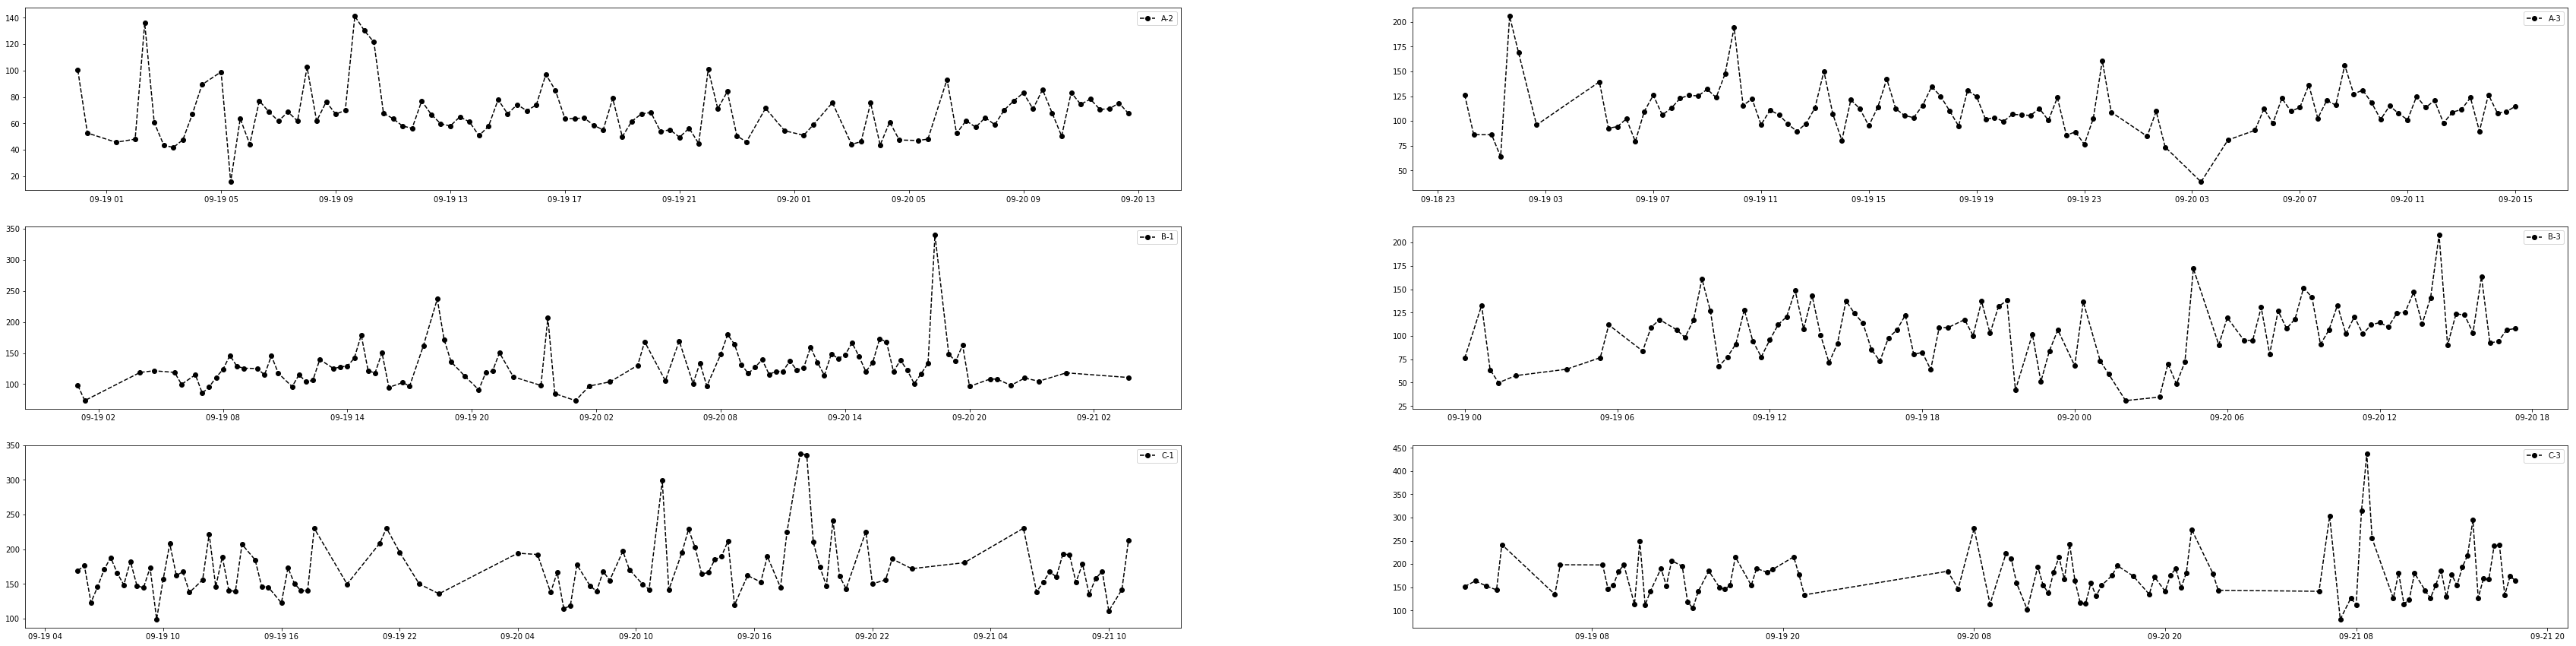

In [50]:
# 平均时间与路线 平均分布
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['start_time'][:100], group['avg_travel_time'][:100],'ko--', label=k1)
    ax.legend()

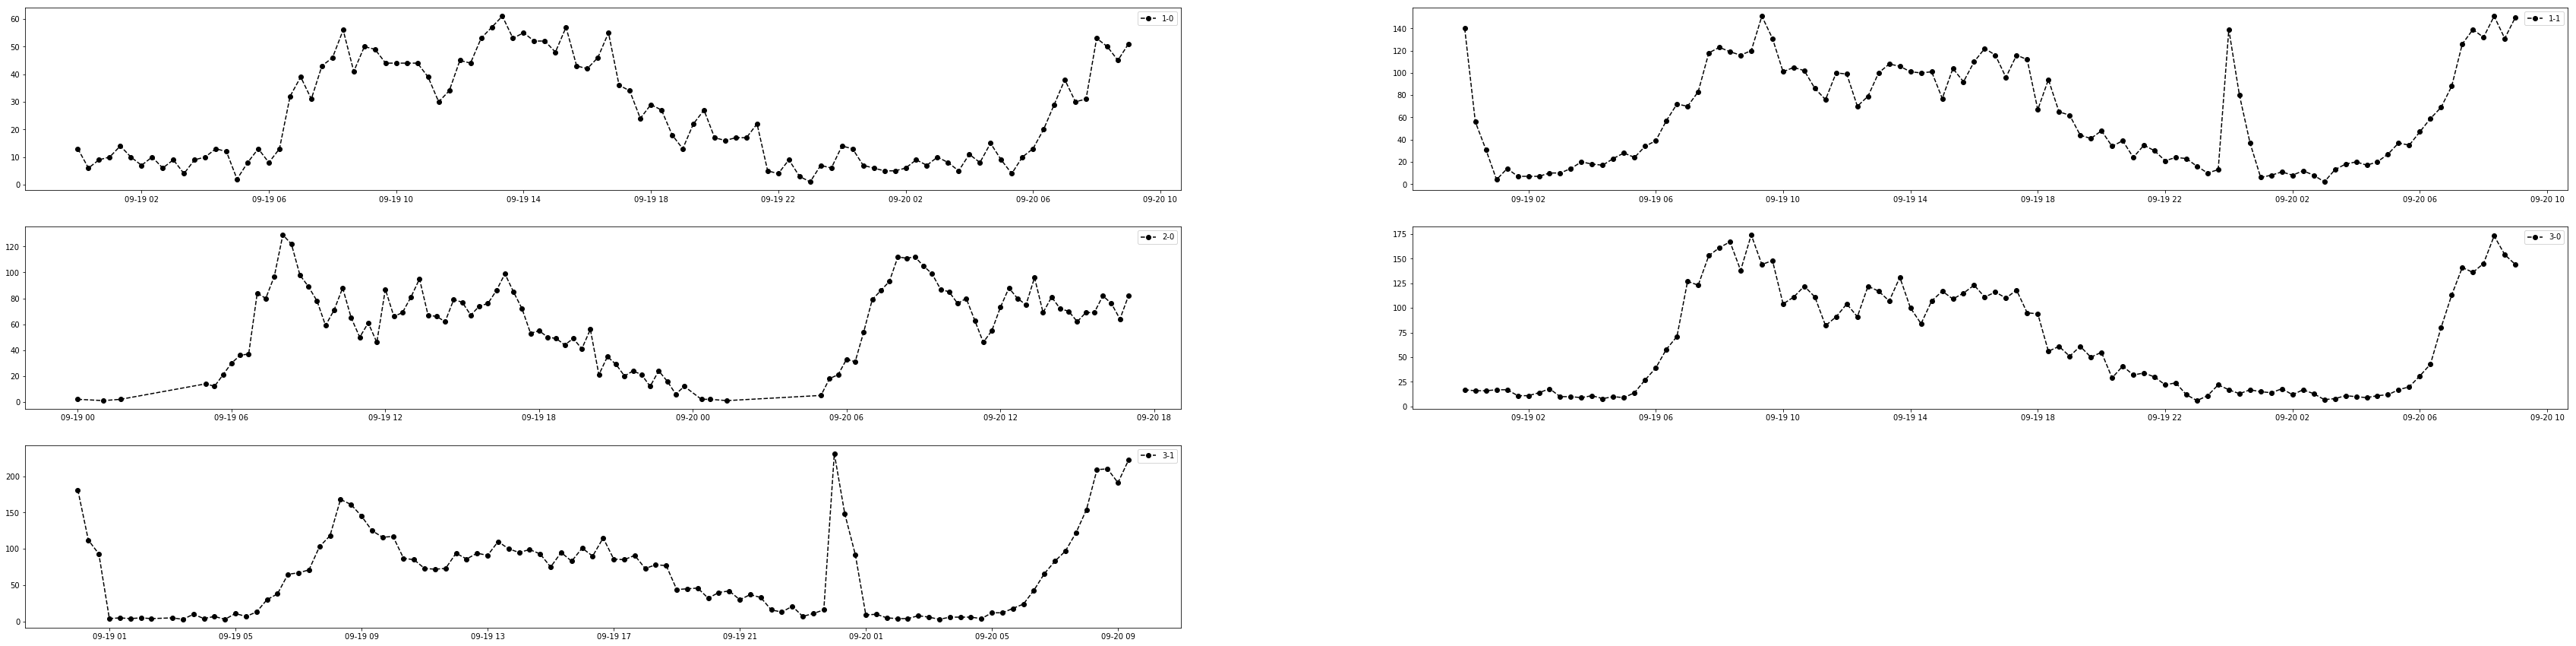

In [49]:
# 平均流量与收费站进出对
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for k1, group in grouped_by_pair:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['start_time'][:100],group['volume'][:100],'ko--',label=k1)
    ax.legend()

In [20]:
del process_data['time_set2']

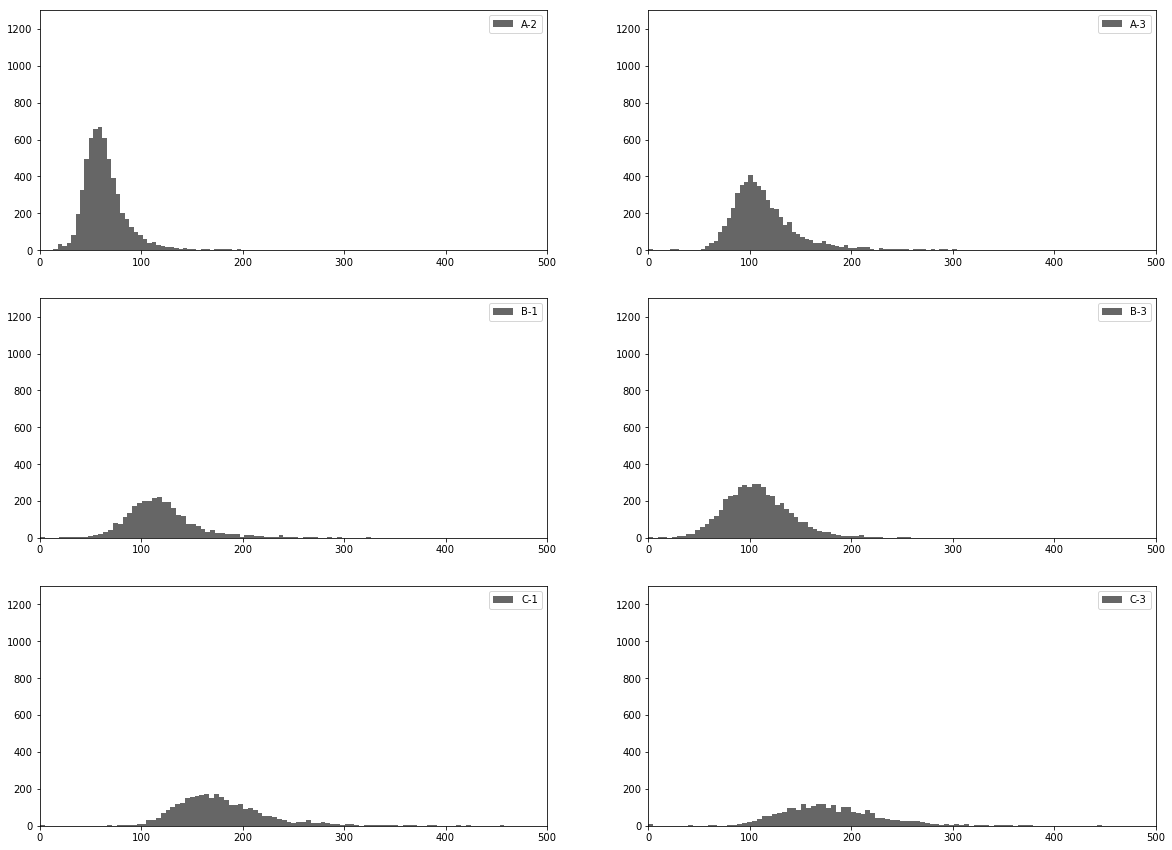

In [22]:
# 平均时间与路线 直方图
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.hist(group['avg_travel_time'], bins=100, alpha=0.6, color='k', label=k1)
    ax.set_xlim([0, 500])
    ax.set_ylim([0, 1300])
    ax.legend()

### 平均时间与星期几的关系 

In [15]:
temp_data = process_data.ix[:,['route','weekday','avg_travel_time']]

In [16]:
# 统计量
grouped_by_routeweekday = temp_data.groupby(['route','weekday'])
grouped_by_routeweekday.mean()

avg_travel_time
route weekday                 
A-2   0              68.229041
      1              63.241386
      2              65.538961
      3              64.721284
      4              68.222609
      5              67.979152
      6              62.269952
A-3   0             130.582152
      1             114.417757
      2             120.185251
      3             118.622136
      4             115.434928
      5             118.275491
      6             114.857582
B-1   0             118.511746
      1             122.179567
      2             123.493402
      3             120.369464
      4             126.832765
      5             128.571240
      6             126.056682
B-3   0             109.294653
      1             107.194509
      2             111.945609
      3             113.616923
      4             111.036381
      5             110.453943
      6             108.465038
C-1   0             171.191824
      1             179.244354
      2             180.920803
      3             181.797345
      4             187.324216
      5             194.166769
      6             184.069851
C-3   0             180.475076
      1             179.811190
      2             187.190577
      3             184.313989
      4             189.940710
      5             192.698111
      6             183.848864

In [17]:
# 统计量
grouped_by_weekday = temp_data.groupby(['weekday'])['avg_travel_time']
grouped_by_weekday.mean()

weekday
0    120.004197
1    116.666190
2    120.746345
3    119.723307
4    121.642759
5    124.813595
6    119.448782
Name: avg_travel_time, dtype: float64

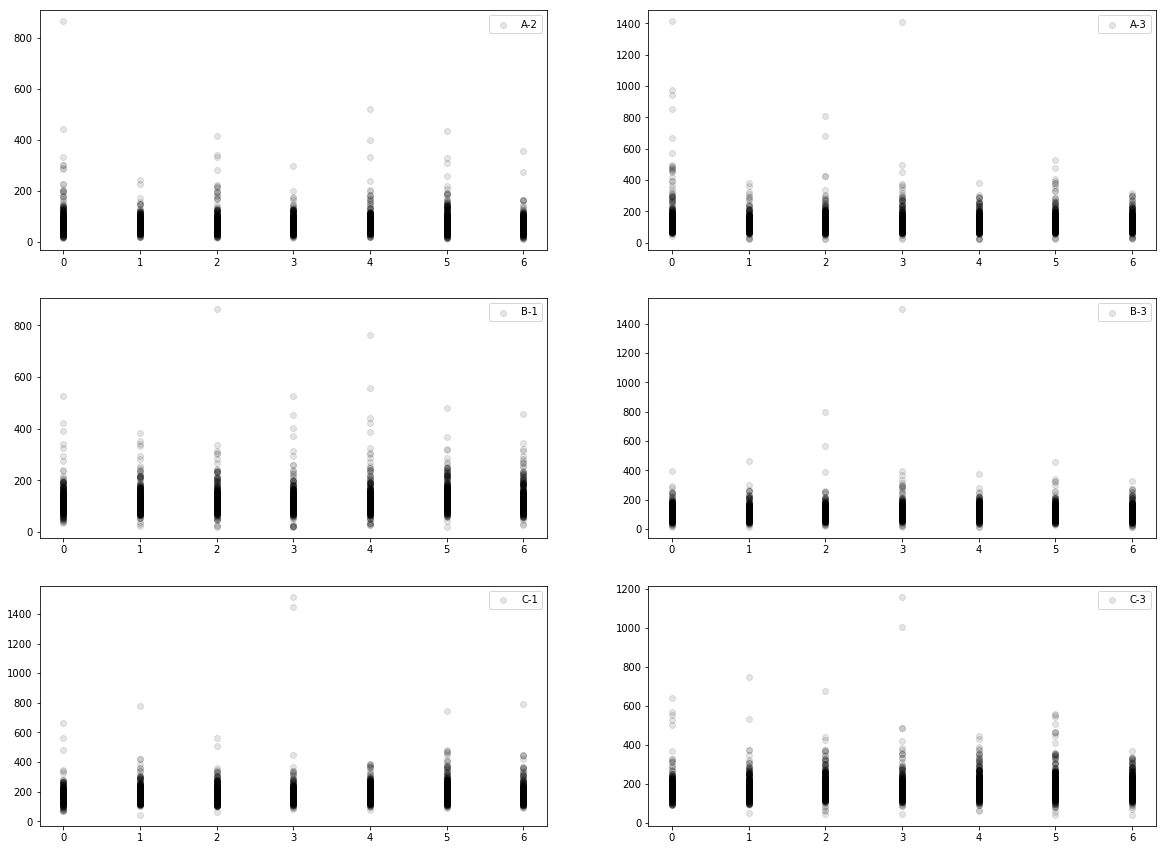

In [18]:
# 平均流量与星期
grouped_by_route = temp_data.groupby(['route'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.scatter(group['weekday'], group['avg_travel_time'], label=k1, color='k', alpha=0.1)
    ax.legend() 

In [19]:
grouped_by_routeweekday.size()

route  weekday
A-2    0          834
       1          844
       2          866
       3          872
       4          870
       5          837
       6          842
A-3    0          739
       1          740
       2          798
       3          763
       4          765
       5          763
       6          736
B-1    0          464
       1          439
       2          435
       3          466
       4          481
       5          484
       6          437
B-3    0          677
       1          692
       2          681
       3          676
       4          713
       5          705
       6          659
C-1    0          455
       1          457
       2          461
       3          467
       4          491
       5          489
       6          470
C-3    0          331
       1          353
       2          381
       3          366
       4          352
       5          397
       6          396
dtype: int64

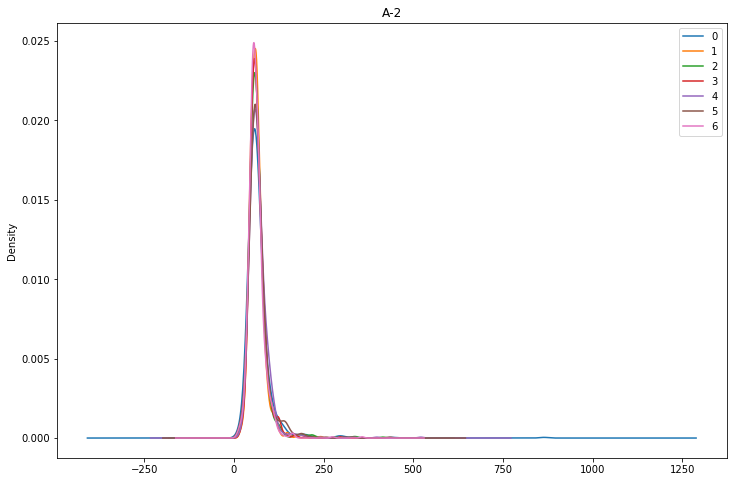

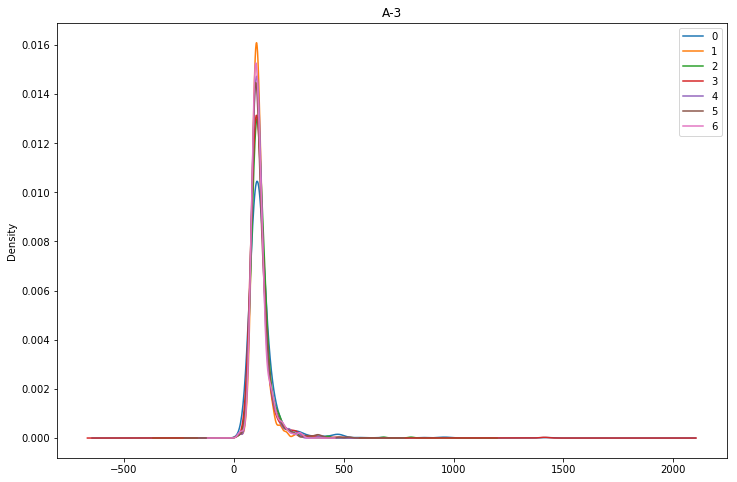

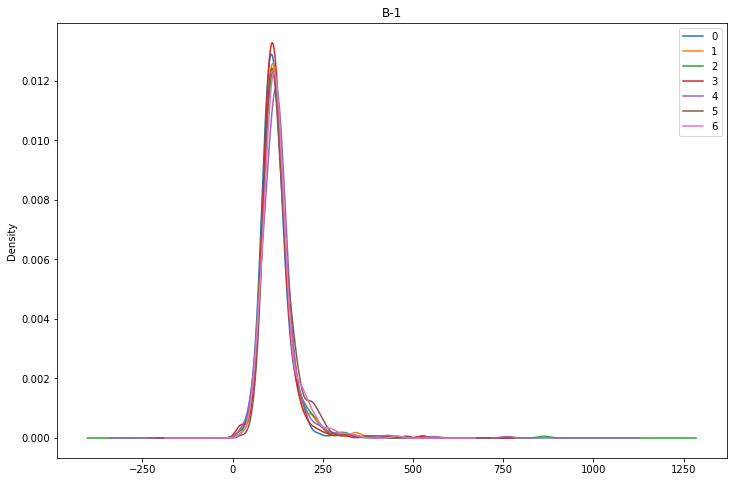

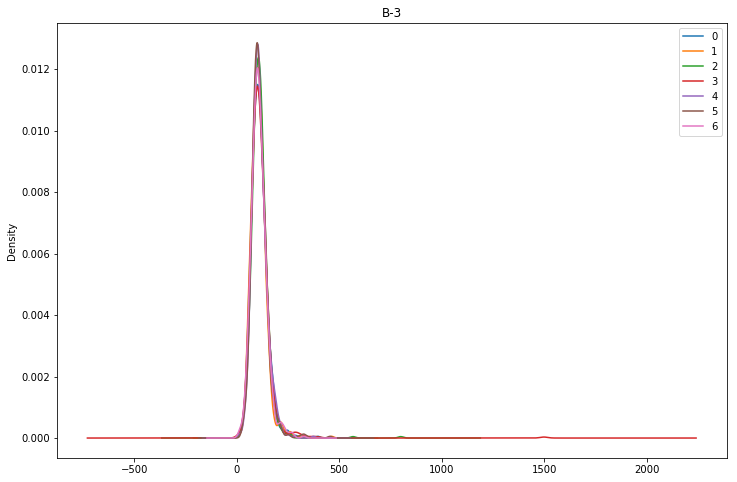

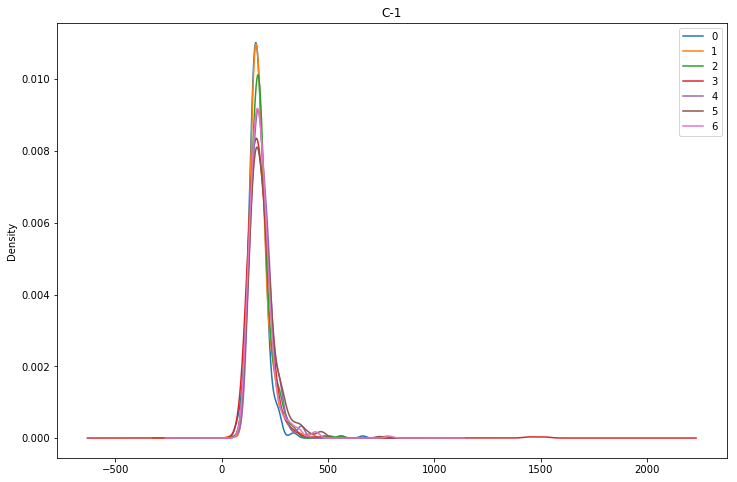

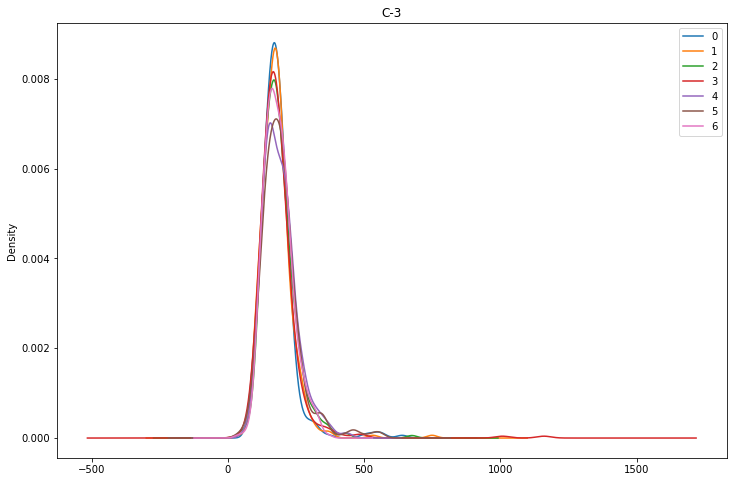

In [20]:
for k, group1 in grouped_by_route:
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    grouped = group1.groupby('weekday')
    for k2, group2 in grouped:
        group2['avg_travel_time'].plot(kind='kde',label=k2)
        ax.legend()

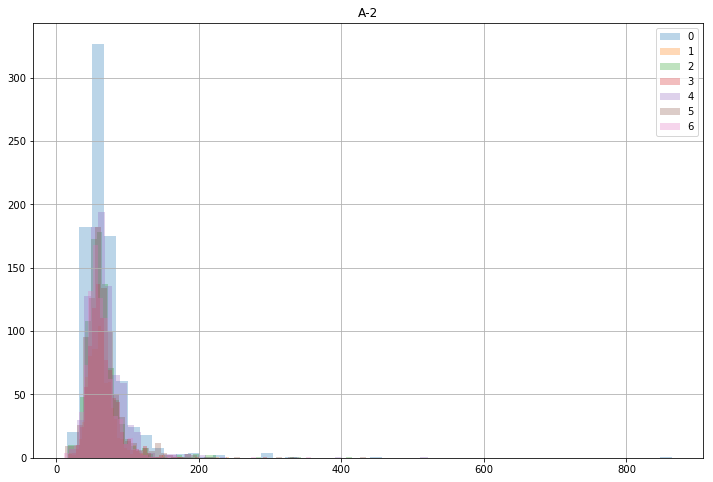

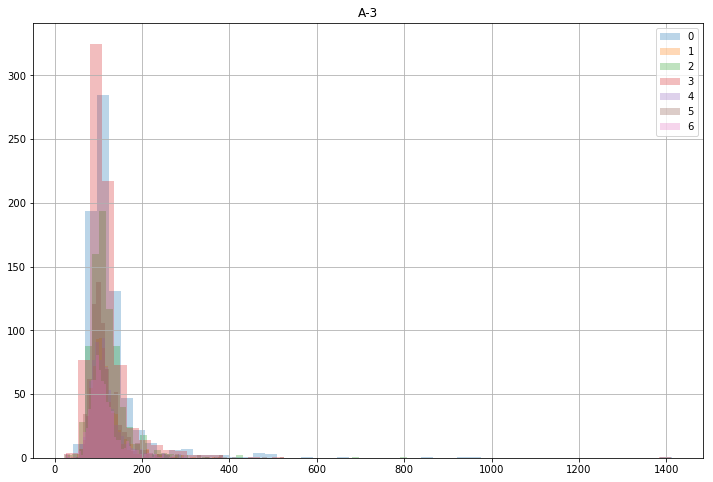

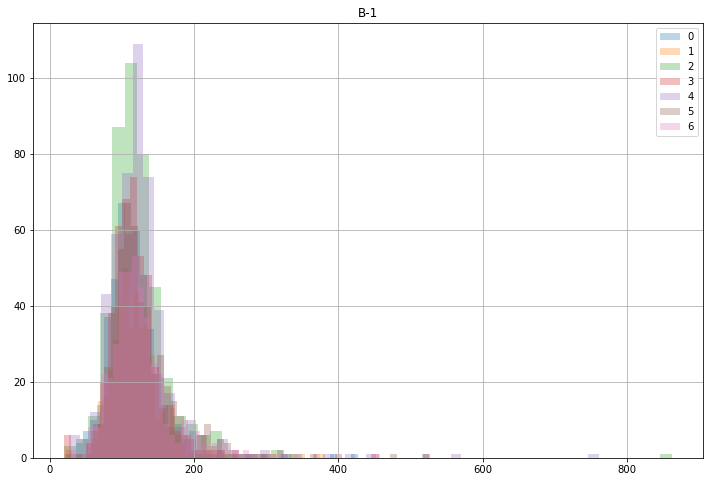

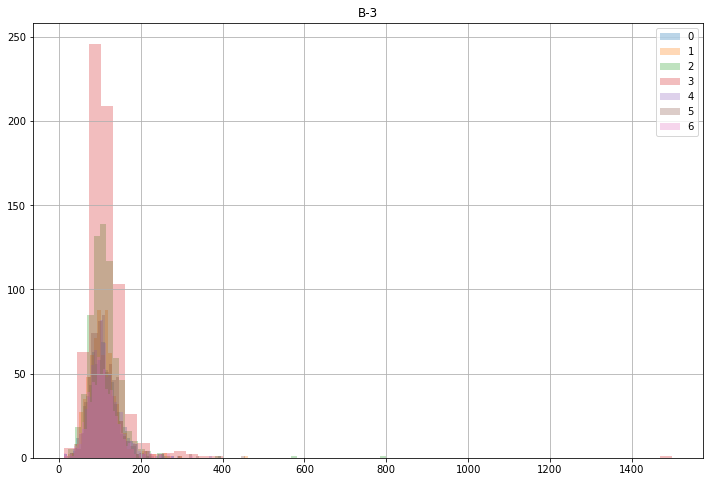

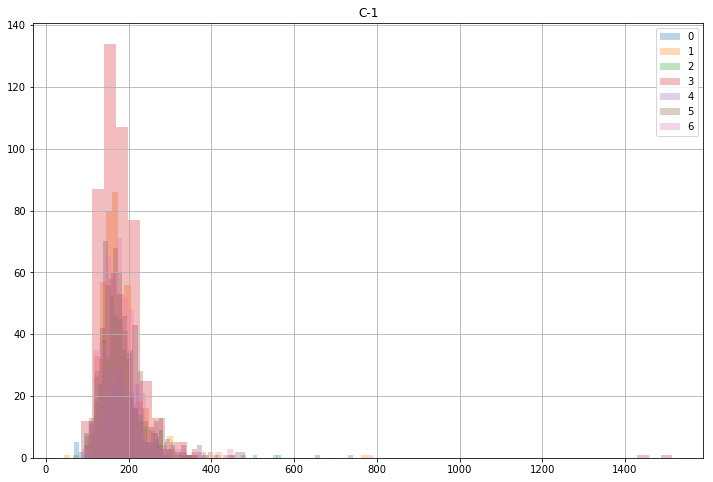

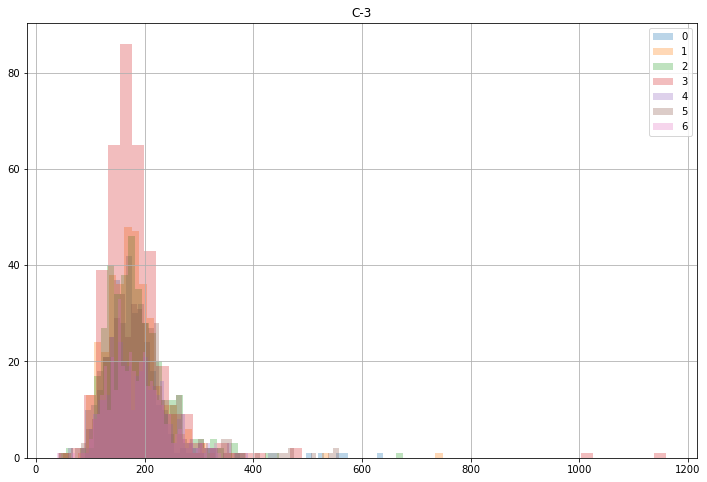

In [21]:
for k, group1 in grouped_by_route:
    grouped = group1.groupby('weekday')
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    for k2, group2 in grouped:
        group2['avg_travel_time'].hist(bins=50, alpha=0.3, label=str(k2))
        plt.legend()
        

### 平均时间与天气的关系 

In [22]:
process_data

intersection_id  tollgate_id                                time_window  \
0                   A            2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   A            2  [2016-07-19 01:20:00,2016-07-19 01:40:00)   
2                   A            2  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3                   A            2  [2016-07-19 02:20:00,2016-07-19 02:40:00)   
4                   A            2  [2016-07-19 02:40:00,2016-07-19 03:00:00)   
5                   A            2  [2016-07-19 03:20:00,2016-07-19 03:40:00)   
6                   A            2  [2016-07-19 03:40:00,2016-07-19 04:00:00)   
7                   A            2  [2016-07-19 04:00:00,2016-07-19 04:20:00)   
8                   A            2  [2016-07-19 04:20:00,2016-07-19 04:40:00)   
9                   A            2  [2016-07-19 04:40:00,2016-07-19 05:00:00)   
10                  A            2  [2016-07-19 05:00:00,2016-07-19 05:20:00)   
11                  A            2  [2016-07-19 05:20:00,2016-07-19 05:40:00)   
12                  A            2  [2016-07-19 05:40:00,2016-07-19 06:00:00)   
13                  A            2  [2016-07-19 06:00:00,2016-07-19 06:20:00)   
14                  A            2  [2016-07-19 06:20:00,2016-07-19 06:40:00)   
15                  A            2  [2016-07-19 06:40:00,2016-07-19 07:00:00)   
16                  A            2  [2016-07-19 07:00:00,2016-07-19 07:20:00)   
17                  A            2  [2016-07-19 07:20:00,2016-07-19 07:40:00)   
18                  A            2  [2016-07-19 07:40:00,2016-07-19 08:00:00)   
19                  A            2  [2016-07-19 08:00:00,2016-07-19 08:20:00)   
20                  A            2  [2016-07-19 08:20:00,2016-07-19 08:40:00)   
21                  A            2  [2016-07-19 08:40:00,2016-07-19 09:00:00)   
22                  A            2  [2016-07-19 09:00:00,2016-07-19 09:20:00)   
23                  A            2  [2016-07-19 09:20:00,2016-07-19 09:40:00)   
24                  A            2  [2016-07-19 09:40:00,2016-07-19 10:00:00)   
25                  A            2  [2016-07-19 10:00:00,2016-07-19 10:20:00)   
26                  A            2  [2016-07-19 10:20:00,2016-07-19 10:40:00)   
27                  A            2  [2016-07-19 10:40:00,2016-07-19 11:00:00)   
28                  A            2  [2016-07-19 11:00:00,2016-07-19 11:20:00)   
29                  A            2  [2016-07-19 11:20:00,2016-07-19 11:40:00)   
...               ...          ...                                        ...   
25114               C            3  [2016-10-16 21:00:00,2016-10-16 21:20:00)   
25115               C            3  [2016-10-16 22:20:00,2016-10-16 22:40:00)   
25116               C            3  [2016-10-16 23:00:00,2016-10-16 23:20:00)   
25117               C            3  [2016-10-17 00:20:00,2016-10-17 00:40:00)   
25118               C            3  [2016-10-17 08:40:00,2016-10-17 09:00:00)   
25119               C            3  [2016-10-17 09:40:00,2016-10-17 10:00:00)   
25120               C            3  [2016-10-17 10:00:00,2016-10-17 10:20:00)   
25121               C            3  [2016-10-17 10:40:00,2016-10-17 11:00:00)   
25122               C            3  [2016-10-17 12:00:00,2016-10-17 12:20:00)   
25123               C            3  [2016-10-17 12:20:00,2016-10-17 12:40:00)   
25124               C            3  [2016-10-17 12:40:00,2016-10-17 13:00:00)   
25125               C            3  [2016-10-17 13:20:00,2016-10-17 13:40:00)   
25126               C            3  [2016-10-17 13:40:00,2016-10-17 14:00:00)   
25127               C            3  [2016-10-17 14:20:00,2016-10-17 14:40:00)   
25128               C            3  [2016-10-17 14:40:00,2016-10-17 15:00:00)   
25129               C            3  [2016-10-17 15:00:00,2016-10-17 15:20:00)   
25130               C            3  [2016-10-17 16:00:00,2016-10-17 16:20:00)   
25131               C            3  [

In [16]:
temp_data = process_data.ix[:,['route','avg_travel_time','pressure','sea_pressure','wind_direction','wind_speed','temperature','rel_humidity','precipitation']]

In [17]:
temp_data

route  avg_travel_time  pressure  sea_pressure  wind_direction  \
0       B-3            70.85    1000.9        1005.8           219.0   
1       B-3           148.79    1000.9        1005.8           219.0   
2       B-3            93.72    1000.9        1005.8           219.0   
3       B-3            67.81    1000.9        1005.8           219.0   
4       B-3           167.55    1000.9        1005.8           219.0   
5       B-3            98.49    1000.5        1005.3           212.0   
6       B-3            96.67    1000.5        1005.3           212.0   
7       B-3            53.15    1000.5        1005.3           212.0   
8       B-3            55.25    1000.5        1005.3           212.0   
9       B-3           209.66    1000.5        1005.3           212.0   
10      B-3           145.94     999.7        1004.5           239.0   
11      B-3           127.35     999.7        1004.5           239.0   
12      B-3            97.20     999.7        1004.5           239.0   
13      B-3           118.43     999.7        1004.5           239.0   
14      B-3            82.63     999.7        1004.5           239.0   
15      B-3           110.50     999.7        1004.5           239.0   
16      B-3           125.76     999.7        1004.5           239.0   
17      B-3           141.33     999.7        1004.5           239.0   
18      B-3           176.08     999.7        1004.5           239.0   
19      B-3           165.29     998.7        1003.5           218.0   
20      B-3           127.38     998.7        1003.5           218.0   
21      B-3           117.83     998.7        1003.5           218.0   
22      B-3            98.92     998.7        1003.5           218.0   
23      B-3           113.00     998.7        1003.5           218.0   
24      B-3            98.15     998.7        1003.5           218.0   
25      B-3            95.98     998.7        1003.5           218.0   
26      B-3            84.36     998.7        1003.5           218.0   
27      B-3            96.54     998.7        1003.5           218.0   
28      B-3           144.87    1000.2        1005.0           215.0   
29      B-3           136.36    1000.2        1005.0           215.0   
...     ...              ...       ...           ...             ...   
25085   C-1           142.21    1013.7        1018.7           109.0   
25086   C-1           166.92    1013.7        1018.7           109.0   
25087   C-1           180.04    1013.7        1018.7           109.0   
25088   C-1           166.94    1013.7        1018.7           109.0   
25089   C-1           153.59    1013.7        1018.7           109.0   
25090   C-1           172.90    1013.7        1018.7           109.0   
25091   C-1           167.98    1014.3        1019.4            17.0   
25092   C-1           203.06    1014.3        1019.4            17.0   
25093   C-1           217.37    1014.3        1019.4            17.0   
25094   C-1           165.00    1014.3        1019.4            17.0   
25095   C-1           218.76    1014.3        1019.4            17.0   
25096   C-1           165.84    1014.3        1019.4            17.0   
25097   C-1           191.14    1014.3        1019.4            17.0   
25098   C-1           187.10    1014.3        1019.4            17.0   
25099   C-1           175.01    1014.3        1019.4            17.0   
25100   C-1           143.98    1014.7        1019.8           222.0   
25101   C-1           134.58    1014.7        1019.8           222.0   
25102   C-1           190.59    1014.7        1019.8           222.0   
25103   C-1           180.28    1014.7        1019.8           222.0   
25104   C-1           150.44    1014.7        1019.8           222.0   
25105   C-1           170.89    1014.7        1019.8           222.0   
25106   C-1           159.01    1014.7        1019.8           222.0   
25107   C-1           170.13    1014.7        1019.8           222.0   
25108   C-1           267.11    1014.0        

In [8]:
grouped_by_route = temp_data.groupby('route')

NameError: name 'temp_data' is not defined

In [26]:
grouped_by_route.size()

route
A-2    5965
A-3    5304
B-1    3206
B-3    4803
C-1    3290
C-3    2576
dtype: int64

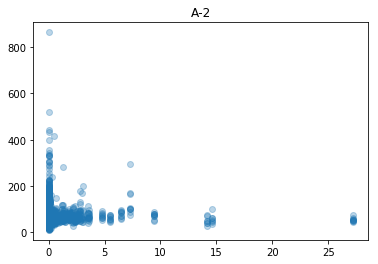

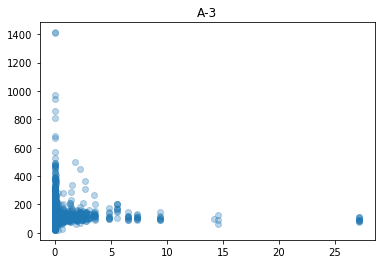

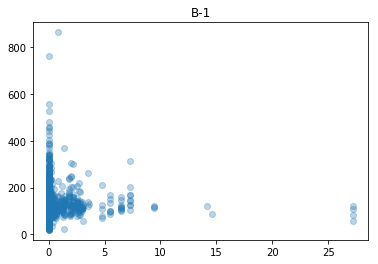

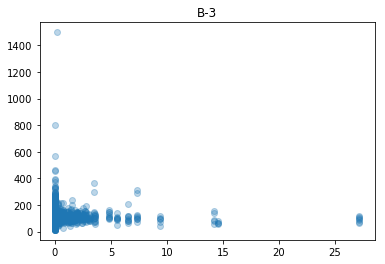

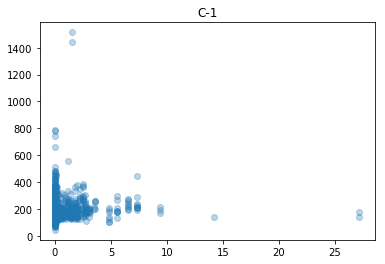

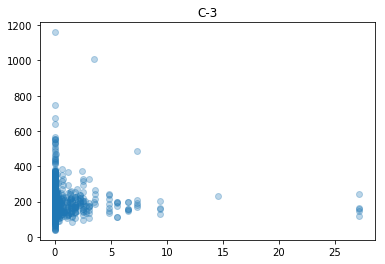

In [27]:
# 平均流量与降水量
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['precipitation'],group['avg_travel_time'],alpha=0.3)

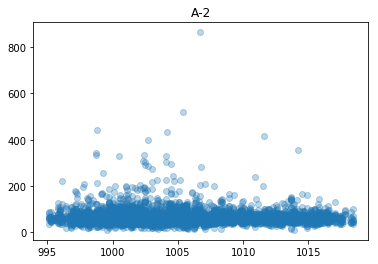

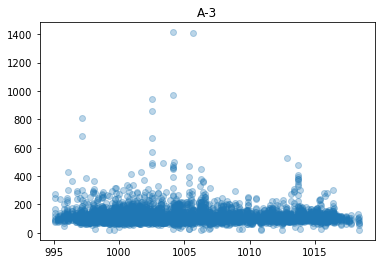

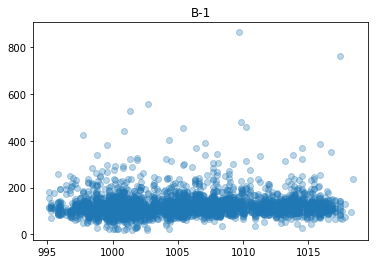

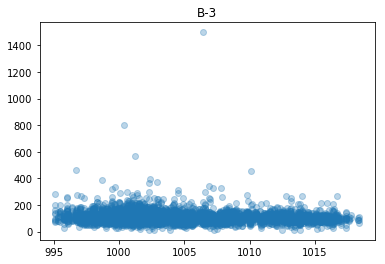

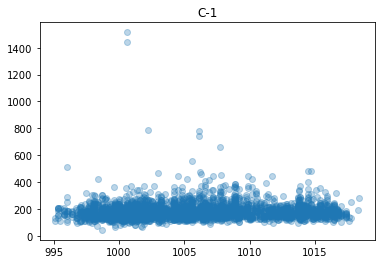

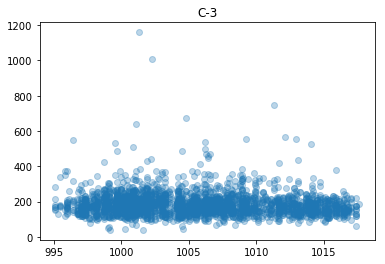

In [28]:
# 平均流量与大气压
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['pressure'],group['avg_travel_time'],alpha=0.3)

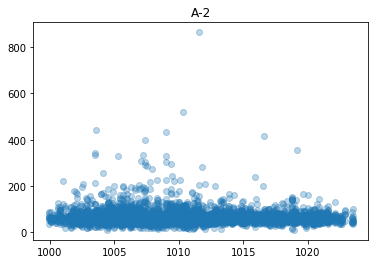

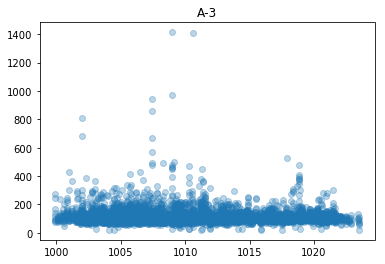

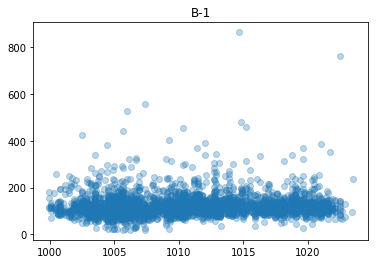

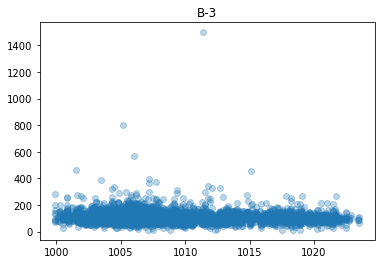

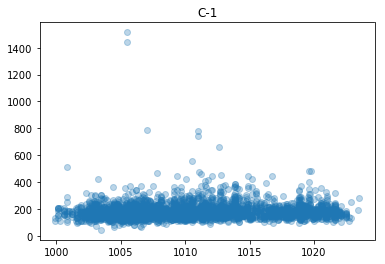

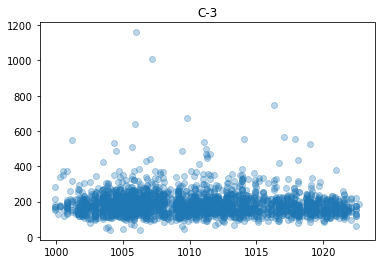

In [29]:
# 平均流量与海平面压力
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['sea_pressure'],group['avg_travel_time'],alpha=0.3)

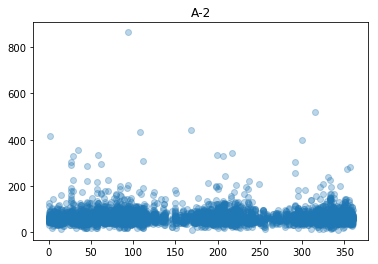

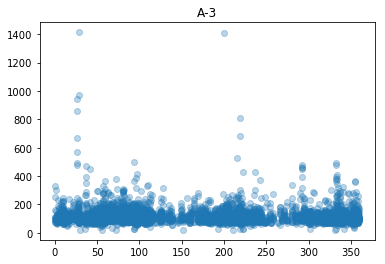

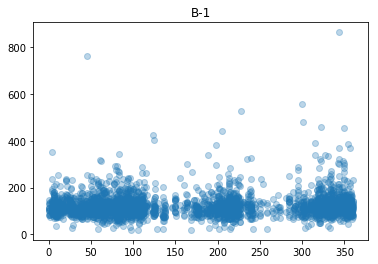

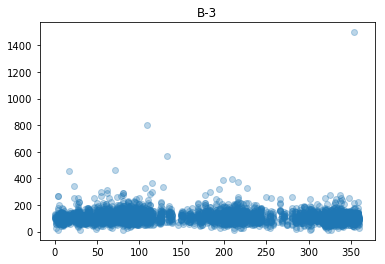

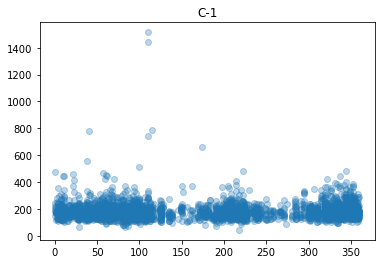

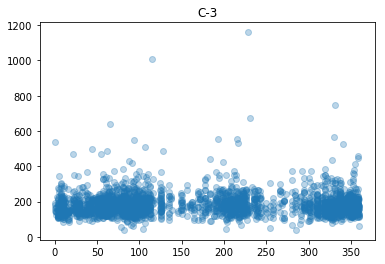

In [30]:
# 平均流量与风向
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    x = group['wind_direction']
    y = group['avg_travel_time']
    index = x<=360
    x = x[index]
    y = y[index]
    plt.scatter(x,y,alpha=0.3)

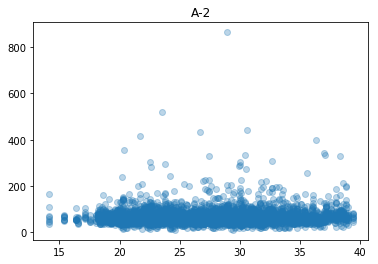

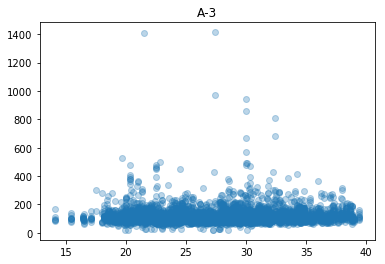

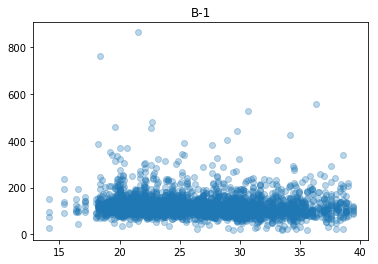

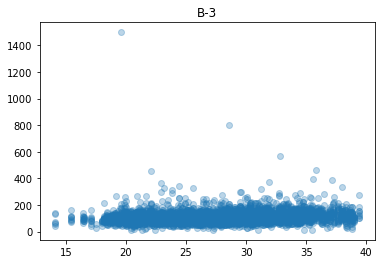

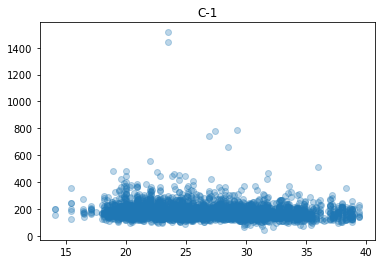

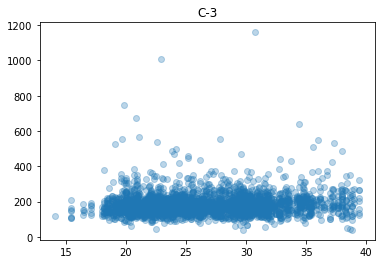

In [31]:
# 平均流量与温度
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['temperature'],group['avg_travel_time'],alpha=0.3)

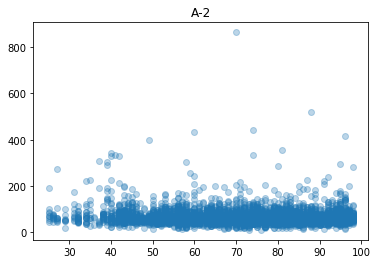

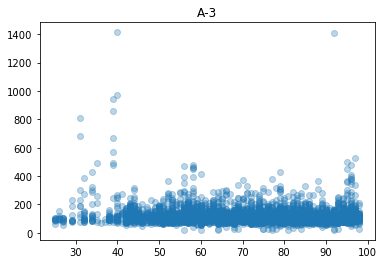

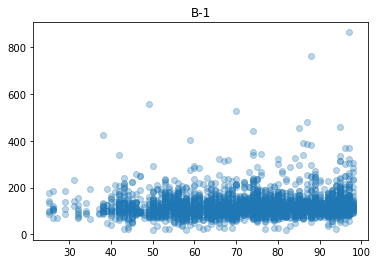

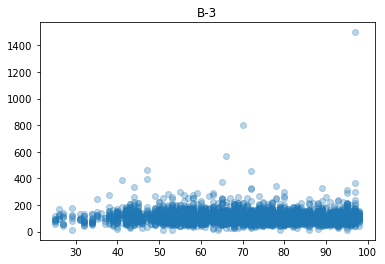

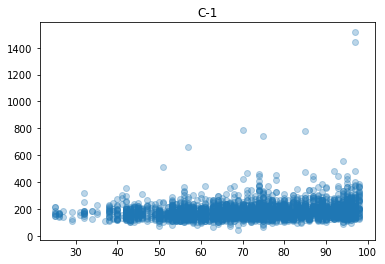

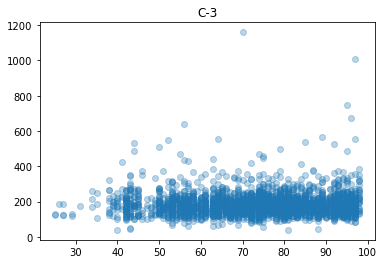

In [32]:
# 平均流量与相对湿度
for k, group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['rel_humidity'],group['avg_travel_time'],alpha=0.3)

### 平均时间与法定节假日

In [33]:
important_date = ['2016-09-15','2016-09-16','2016-09-17','2016-10-01','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07']

In [34]:
index = (process_data['date']=='2016-09-15') | (process_data['date']=='2016-09-16') | (process_data['date']=='2016-09-17') | (process_data['date']=='2016-10-01') | (process_data['date']=='2016-10-02') | (process_data['date']=='2016-10-03') | (process_data['date']=='2016-10-04') | (process_data['date']=='2016-10-05') | (process_data['date']=='2016-10-06') | (process_data['date']=='2016-10-07') 
important_date_sample = process_data.ix[index,:]
for i in range(len(index)):
    index[i] = ~index[i]
unimportant_data_sample = process_data.ix[index,:]

In [35]:
avgtime_important_date = important_date_sample[['route','avg_travel_time']]

In [36]:
avgtime_important_date.groupby('route').mean()

avg_travel_time
route                 
A-2          60.505810
A-3         107.466704
B-1         118.055617
B-3         101.171955
C-1         187.737834
C-3         184.847368

In [37]:
avgtime_unimportant_date = unimportant_data_sample[['route','avg_travel_time']]

In [38]:
avgtime_unimportant_date.groupby('route').mean()

avg_travel_time
route                 
A-2          66.408836
A-3         120.441377
B-1         124.876663
B-3         111.551009
C-1         181.898724
C-3         185.759972

### 平均时间与一天24小时

In [39]:
process_data

intersection_id  tollgate_id                                time_window  \
0                   A            2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   A            2  [2016-07-19 01:20:00,2016-07-19 01:40:00)   
2                   A            2  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3                   A            2  [2016-07-19 02:20:00,2016-07-19 02:40:00)   
4                   A            2  [2016-07-19 02:40:00,2016-07-19 03:00:00)   
5                   A            2  [2016-07-19 03:20:00,2016-07-19 03:40:00)   
6                   A            2  [2016-07-19 03:40:00,2016-07-19 04:00:00)   
7                   A            2  [2016-07-19 04:00:00,2016-07-19 04:20:00)   
8                   A            2  [2016-07-19 04:20:00,2016-07-19 04:40:00)   
9                   A            2  [2016-07-19 04:40:00,2016-07-19 05:00:00)   
10                  A            2  [2016-07-19 05:00:00,2016-07-19 05:20:00)   
11                  A            2  [2016-07-19 05:20:00,2016-07-19 05:40:00)   
12                  A            2  [2016-07-19 05:40:00,2016-07-19 06:00:00)   
13                  A            2  [2016-07-19 06:00:00,2016-07-19 06:20:00)   
14                  A            2  [2016-07-19 06:20:00,2016-07-19 06:40:00)   
15                  A            2  [2016-07-19 06:40:00,2016-07-19 07:00:00)   
16                  A            2  [2016-07-19 07:00:00,2016-07-19 07:20:00)   
17                  A            2  [2016-07-19 07:20:00,2016-07-19 07:40:00)   
18                  A            2  [2016-07-19 07:40:00,2016-07-19 08:00:00)   
19                  A            2  [2016-07-19 08:00:00,2016-07-19 08:20:00)   
20                  A            2  [2016-07-19 08:20:00,2016-07-19 08:40:00)   
21                  A            2  [2016-07-19 08:40:00,2016-07-19 09:00:00)   
22                  A            2  [2016-07-19 09:00:00,2016-07-19 09:20:00)   
23                  A            2  [2016-07-19 09:20:00,2016-07-19 09:40:00)   
24                  A            2  [2016-07-19 09:40:00,2016-07-19 10:00:00)   
25                  A            2  [2016-07-19 10:00:00,2016-07-19 10:20:00)   
26                  A            2  [2016-07-19 10:20:00,2016-07-19 10:40:00)   
27                  A            2  [2016-07-19 10:40:00,2016-07-19 11:00:00)   
28                  A            2  [2016-07-19 11:00:00,2016-07-19 11:20:00)   
29                  A            2  [2016-07-19 11:20:00,2016-07-19 11:40:00)   
...               ...          ...                                        ...   
25114               C            3  [2016-10-16 21:00:00,2016-10-16 21:20:00)   
25115               C            3  [2016-10-16 22:20:00,2016-10-16 22:40:00)   
25116               C            3  [2016-10-16 23:00:00,2016-10-16 23:20:00)   
25117               C            3  [2016-10-17 00:20:00,2016-10-17 00:40:00)   
25118               C            3  [2016-10-17 08:40:00,2016-10-17 09:00:00)   
25119               C            3  [2016-10-17 09:40:00,2016-10-17 10:00:00)   
25120               C            3  [2016-10-17 10:00:00,2016-10-17 10:20:00)   
25121               C            3  [2016-10-17 10:40:00,2016-10-17 11:00:00)   
25122               C            3  [2016-10-17 12:00:00,2016-10-17 12:20:00)   
25123               C            3  [2016-10-17 12:20:00,2016-10-17 12:40:00)   
25124               C            3  [2016-10-17 12:40:00,2016-10-17 13:00:00)   
25125               C            3  [2016-10-17 13:20:00,2016-10-17 13:40:00)   
25126               C            3  [2016-10-17 13:40:00,2016-10-17 14:00:00)   
25127               C            3  [2016-10-17 14:20:00,2016-10-17 14:40:00)   
25128               C            3  [2016-10-17 14:40:00,2016-10-17 15:00:00)   
25129               C            3  [2016-10-17 15:00:00,2016-10-17 15:20:00)   
25130               C            3  [2016-10-17 16:00:00,2016-10-17 16:20:00)   
25131               C            3  [

In [40]:
process_data['hour'] = process_data['start_time'].map(lambda x : x.time())

In [41]:
process_data

intersection_id  tollgate_id                                time_window  \
0                   A            2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   A            2  [2016-07-19 01:20:00,2016-07-19 01:40:00)   
2                   A            2  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3                   A            2  [2016-07-19 02:20:00,2016-07-19 02:40:00)   
4                   A            2  [2016-07-19 02:40:00,2016-07-19 03:00:00)   
5                   A            2  [2016-07-19 03:20:00,2016-07-19 03:40:00)   
6                   A            2  [2016-07-19 03:40:00,2016-07-19 04:00:00)   
7                   A            2  [2016-07-19 04:00:00,2016-07-19 04:20:00)   
8                   A            2  [2016-07-19 04:20:00,2016-07-19 04:40:00)   
9                   A            2  [2016-07-19 04:40:00,2016-07-19 05:00:00)   
10                  A            2  [2016-07-19 05:00:00,2016-07-19 05:20:00)   
11                  A            2  [2016-07-19 05:20:00,2016-07-19 05:40:00)   
12                  A            2  [2016-07-19 05:40:00,2016-07-19 06:00:00)   
13                  A            2  [2016-07-19 06:00:00,2016-07-19 06:20:00)   
14                  A            2  [2016-07-19 06:20:00,2016-07-19 06:40:00)   
15                  A            2  [2016-07-19 06:40:00,2016-07-19 07:00:00)   
16                  A            2  [2016-07-19 07:00:00,2016-07-19 07:20:00)   
17                  A            2  [2016-07-19 07:20:00,2016-07-19 07:40:00)   
18                  A            2  [2016-07-19 07:40:00,2016-07-19 08:00:00)   
19                  A            2  [2016-07-19 08:00:00,2016-07-19 08:20:00)   
20                  A            2  [2016-07-19 08:20:00,2016-07-19 08:40:00)   
21                  A            2  [2016-07-19 08:40:00,2016-07-19 09:00:00)   
22                  A            2  [2016-07-19 09:00:00,2016-07-19 09:20:00)   
23                  A            2  [2016-07-19 09:20:00,2016-07-19 09:40:00)   
24                  A            2  [2016-07-19 09:40:00,2016-07-19 10:00:00)   
25                  A            2  [2016-07-19 10:00:00,2016-07-19 10:20:00)   
26                  A            2  [2016-07-19 10:20:00,2016-07-19 10:40:00)   
27                  A            2  [2016-07-19 10:40:00,2016-07-19 11:00:00)   
28                  A            2  [2016-07-19 11:00:00,2016-07-19 11:20:00)   
29                  A            2  [2016-07-19 11:20:00,2016-07-19 11:40:00)   
...               ...          ...                                        ...   
25114               C            3  [2016-10-16 21:00:00,2016-10-16 21:20:00)   
25115               C            3  [2016-10-16 22:20:00,2016-10-16 22:40:00)   
25116               C            3  [2016-10-16 23:00:00,2016-10-16 23:20:00)   
25117               C            3  [2016-10-17 00:20:00,2016-10-17 00:40:00)   
25118               C            3  [2016-10-17 08:40:00,2016-10-17 09:00:00)   
25119               C            3  [2016-10-17 09:40:00,2016-10-17 10:00:00)   
25120               C            3  [2016-10-17 10:00:00,2016-10-17 10:20:00)   
25121               C            3  [2016-10-17 10:40:00,2016-10-17 11:00:00)   
25122               C            3  [2016-10-17 12:00:00,2016-10-17 12:20:00)   
25123               C            3  [2016-10-17 12:20:00,2016-10-17 12:40:00)   
25124               C            3  [2016-10-17 12:40:00,2016-10-17 13:00:00)   
25125               C            3  [2016-10-17 13:20:00,2016-10-17 13:40:00)   
25126               C            3  [2016-10-17 13:40:00,2016-10-17 14:00:00)   
25127               C            3  [2016-10-17 14:20:00,2016-10-17 14:40:00)   
25128               C            3  [2016-10-17 14:40:00,2016-10-17 15:00:00)   
25129               C            3  [2016-10-17 15:00:00,2016-10-17 15:20:00)   
25130               C            3  [2016-10-17 16:00:00,2016-10-17 16:20:00)   
25131               C            3  [

In [42]:
grouped_by_route = process_data.groupby(['route'])

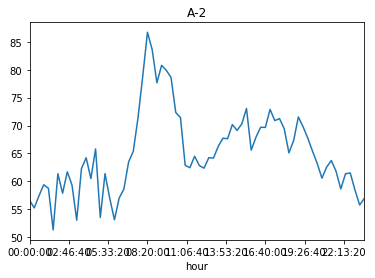

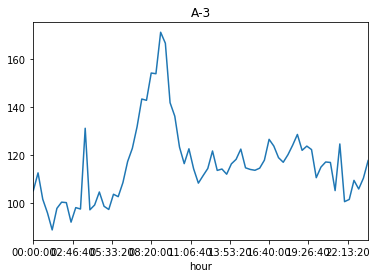

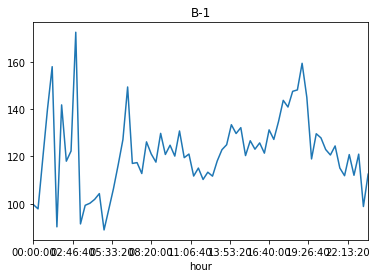

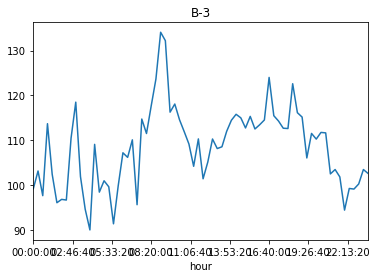

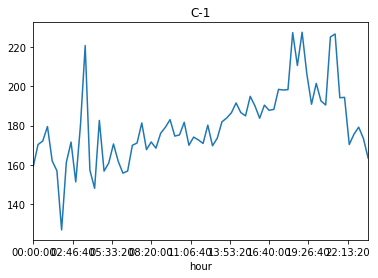

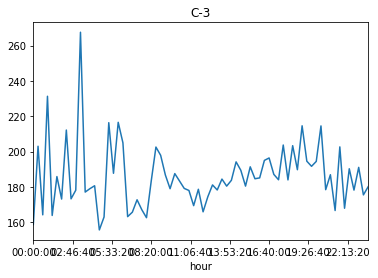

In [43]:
# 24小时平均时间分布
for k,group in grouped_by_route:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    grouped_by_hour = group.groupby('hour')['avg_travel_time']
    grouped_by_hour.mean().plot()

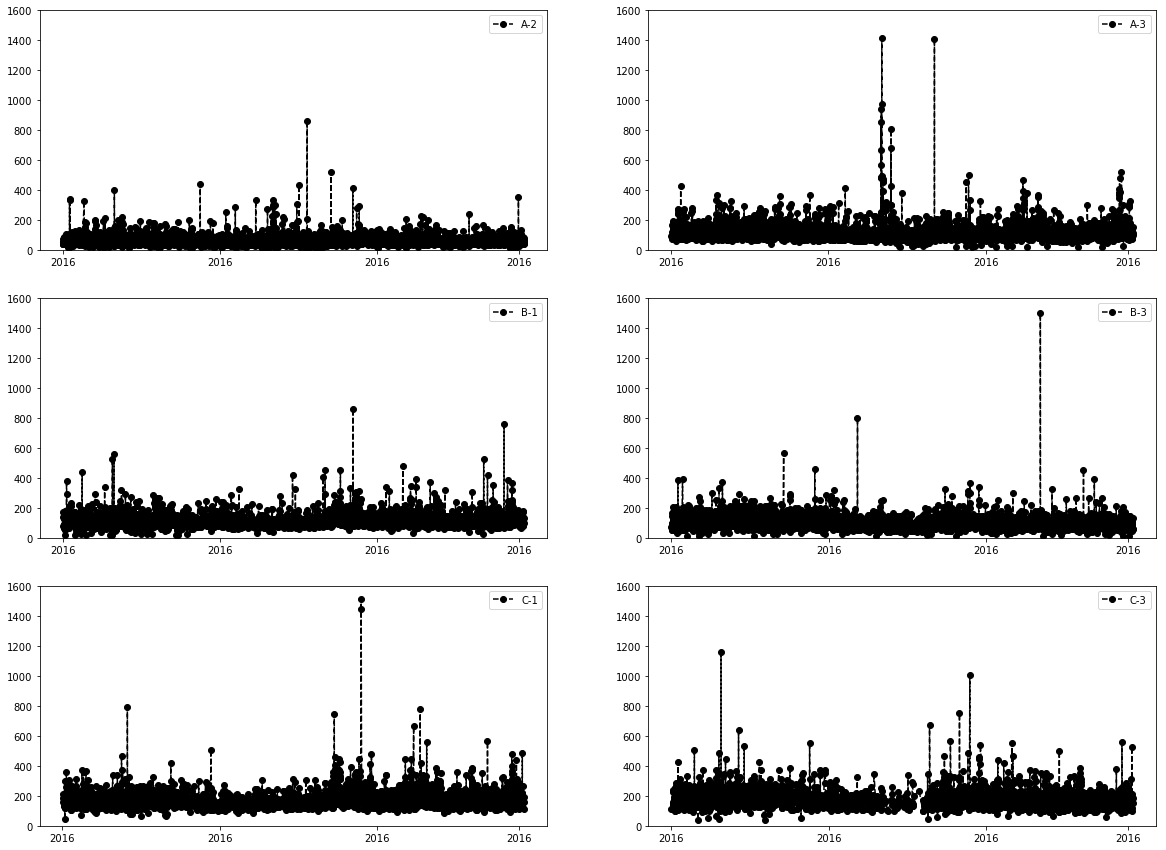

In [44]:
# 平均流量与路线 平均分布
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
xticks = [datetime(2016,7,19,0,0,0),datetime(2016,8,19,0,0,0),datetime(2016,9,19,0,0,0),datetime(2016,10,17,0,0,0)]
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['start_time'],group['avg_travel_time'],'ko--',label=k1)
    ax.set_xticks(xticks)
    ax.set_ylim([0, 1600])
    ax.legend()

In [45]:
# 平均时间较高的样本
for k1, group in grouped_by_route:
    print(k1)
    print(group[group['avg_travel_time']>400])

A-2
     intersection_id  tollgate_id                                time_window  \
1800               A            2  [2016-08-15 02:40:00,2016-08-15 03:00:00)   
3021               A            2  [2016-09-03 15:20:00,2016-09-03 15:40:00)   
3103               A            2  [2016-09-05 05:20:00,2016-09-05 05:40:00)   
3402               A            2  [2016-09-09 22:20:00,2016-09-09 22:40:00)   
3683               A            2  [2016-09-14 05:40:00,2016-09-14 06:00:00)   

      avg_travel_time          start_time        date      hour  pressure  \
1800           441.45 2016-08-15 02:40:00  2016-08-15  02:40:00     998.8   
3021           434.52 2016-09-03 15:20:00  2016-09-03  15:20:00    1004.2   
3103           864.52 2016-09-05 05:20:00  2016-09-05  05:20:00    1006.7   
3402           521.07 2016-09-09 22:20:00  2016-09-09  22:20:00    1005.4   
3683           414.84 2016-09-14 05:40:00  2016-09-14  05:40:00    1011.6   

      sea_pressure  wind_direction  wind_speed  temp

/home/godcedric/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


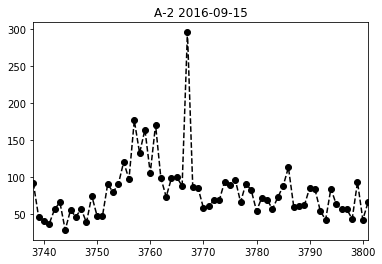

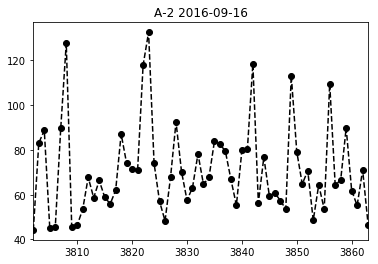

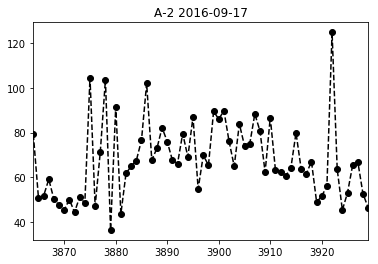

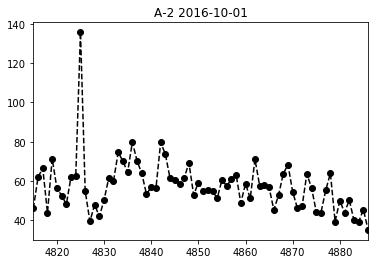

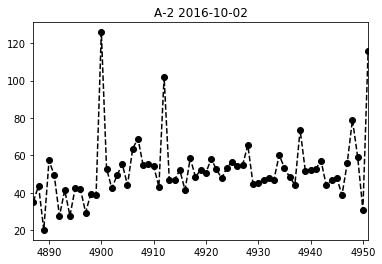

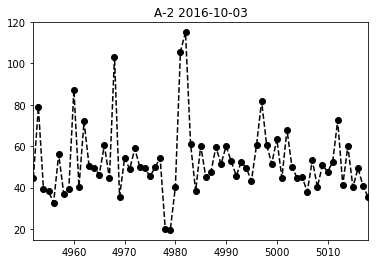

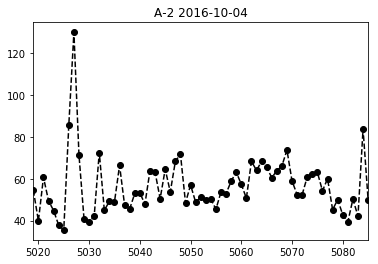

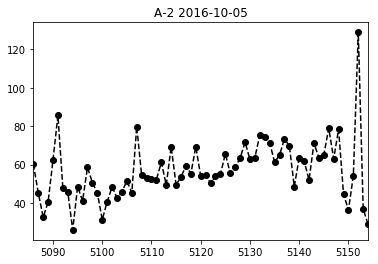

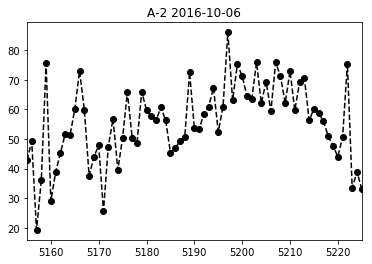

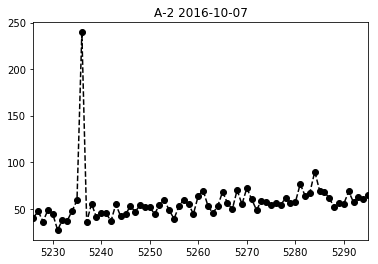

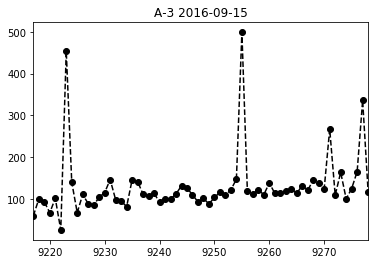

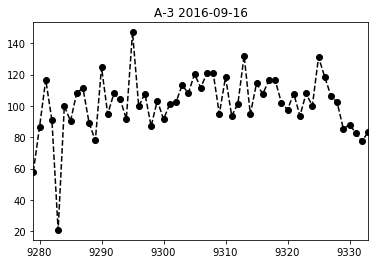

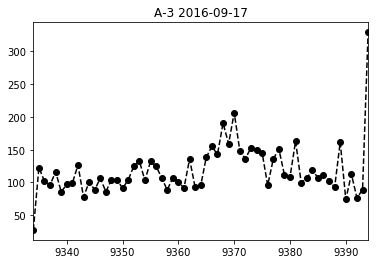

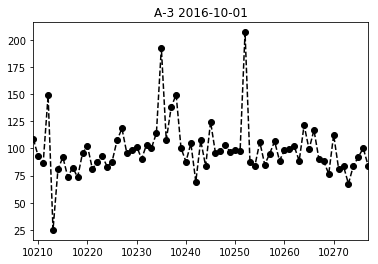

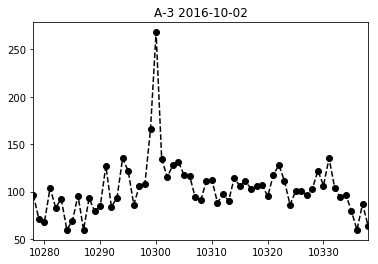

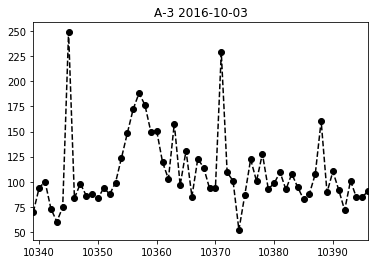

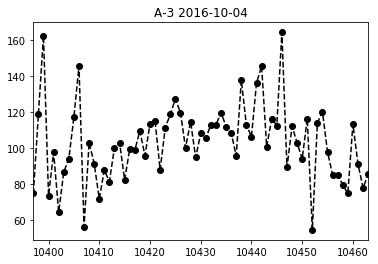

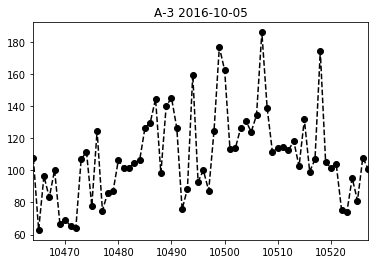

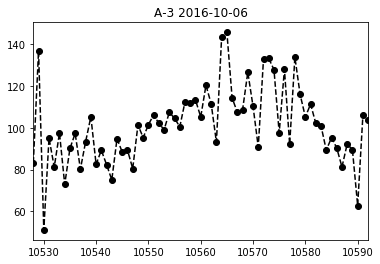

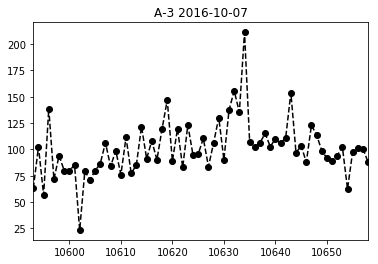

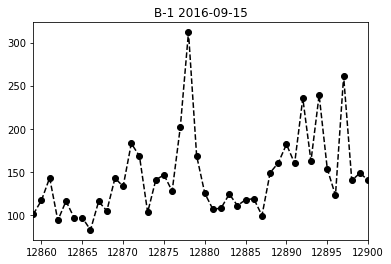

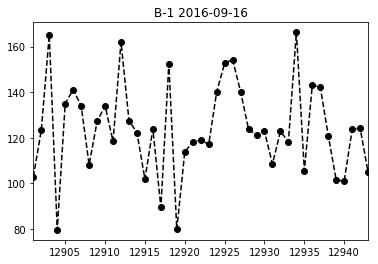

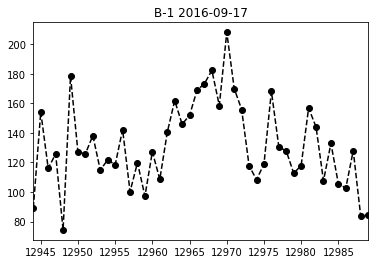

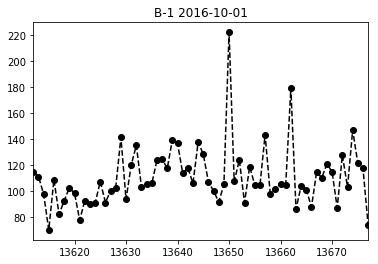

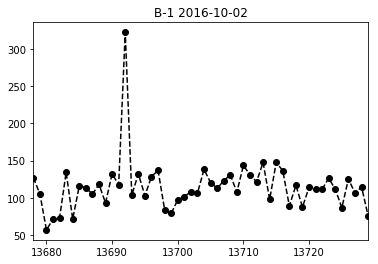

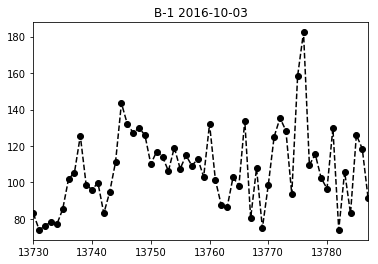

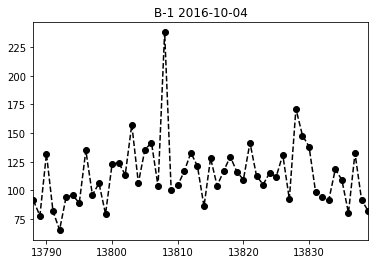

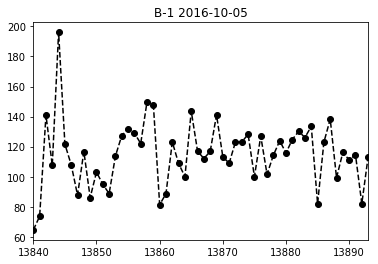

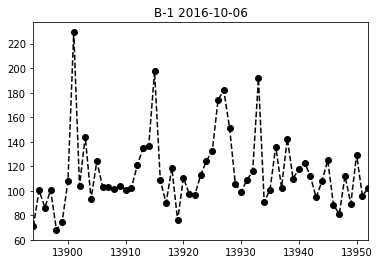

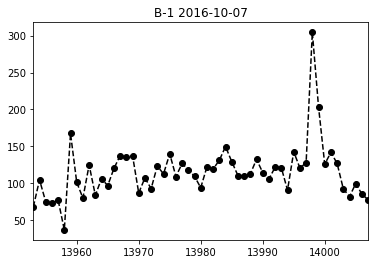

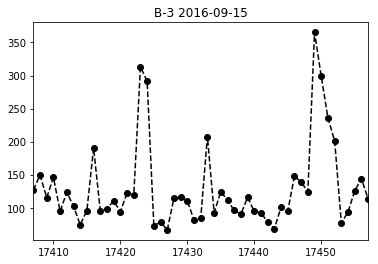

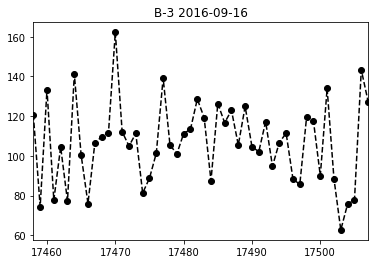

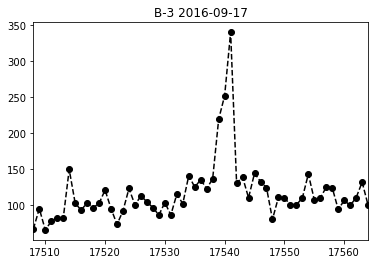

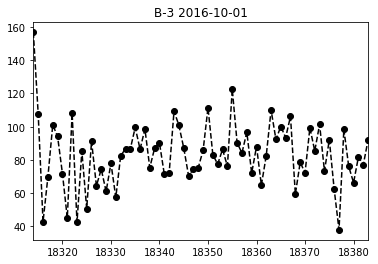

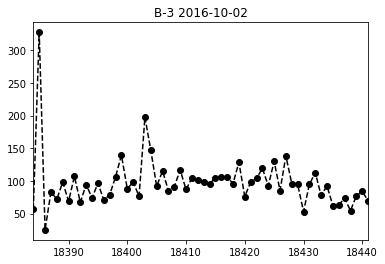

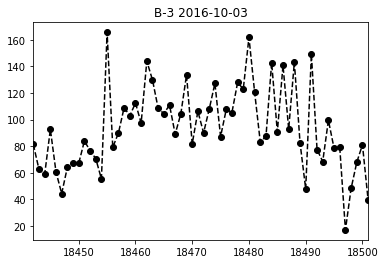

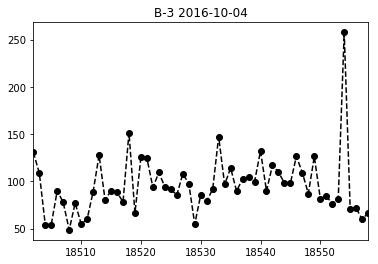

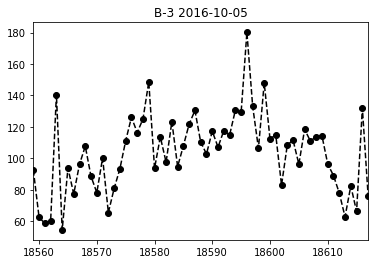

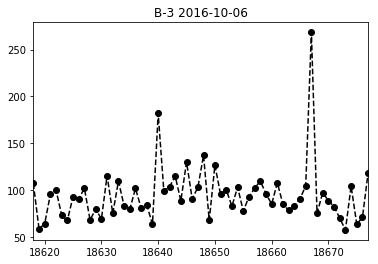

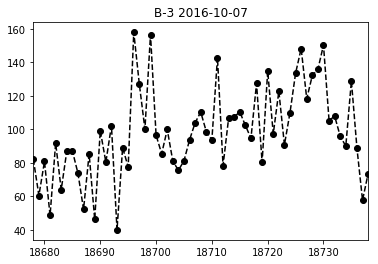

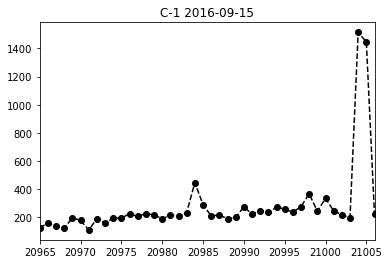

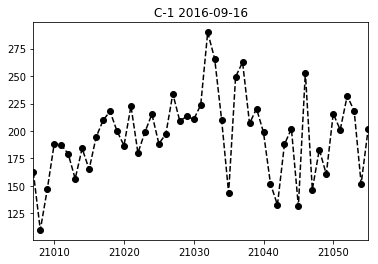

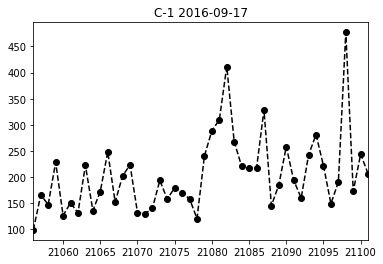

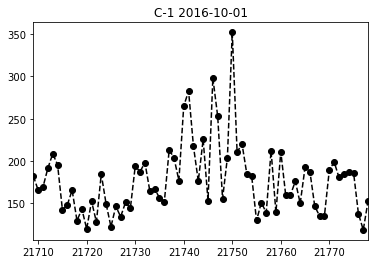

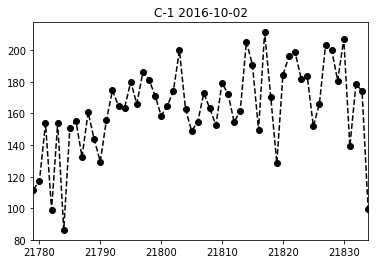

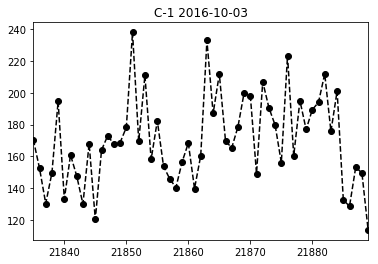

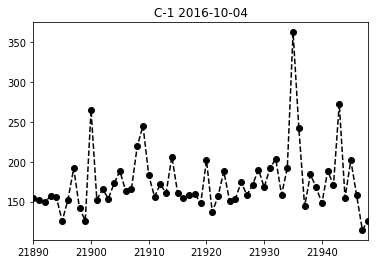

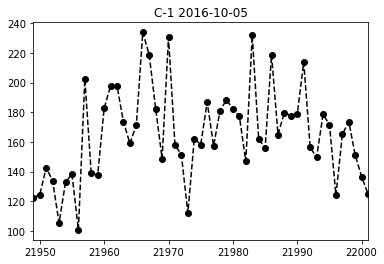

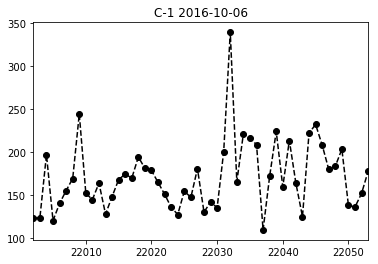

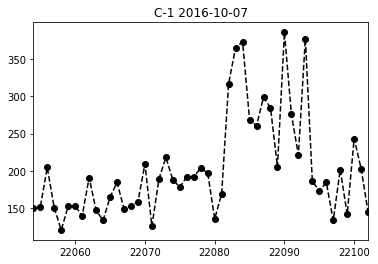

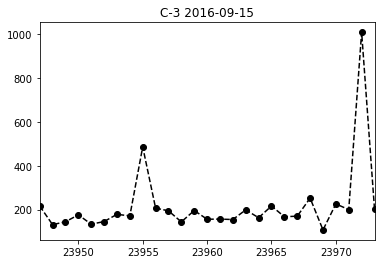

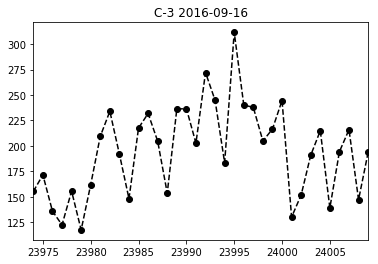

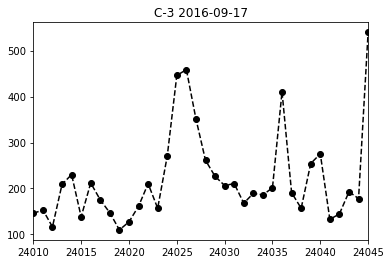

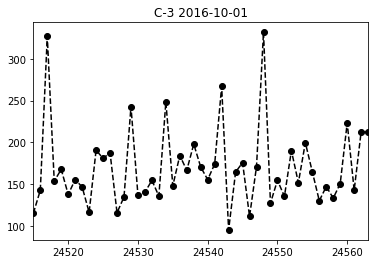

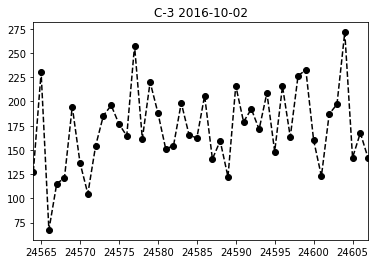

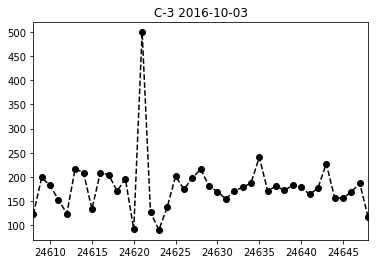

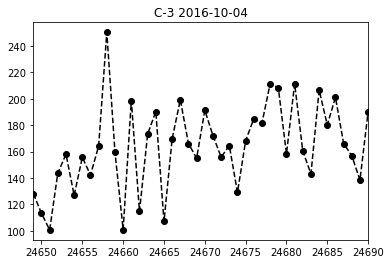

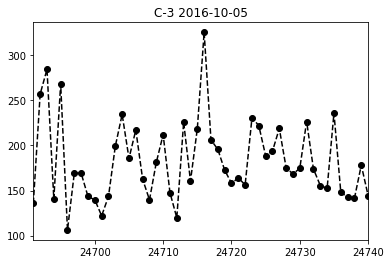

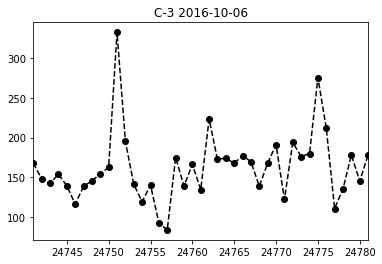

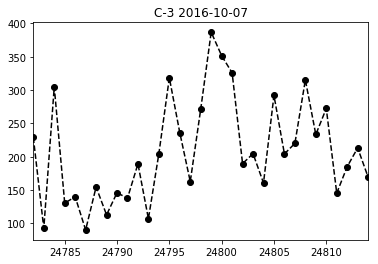

In [46]:
# 随机抽几个样本，看下平均时间在一天的变化情况
grouped_by_day = process_data.groupby(['route','date'])['avg_travel_time']
for (k1,k2), group in grouped_by_day:
    if k2 in important_date:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.set_title(k1+' '+k2)
        group.plot(style='ko--')

## 平均流量

In [39]:
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/training_20min_avg_volume.csv'
raw_data2 = pd.read_csv(in_file_path)

In [40]:
raw_data2['start_time'] = raw_data2['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))

In [41]:
raw_data2['pair'] = raw_data2['tollgate_id'].astype(str) + '-' + raw_data2['direction'].astype(str)

In [42]:
process_data2 = pd.merge(raw_data2, weather_data, on='start_time', how='left')

In [43]:
process_data2['weekday'] = process_data2['start_time'].map(lambda x: x.weekday())

In [44]:
process_data2['time'] = process_data2['start_time'].map(lambda x: x.time())

In [45]:
process_data2

tollgate_id                                time_window  direction  \
0                2  [2016-09-19 00:00:00,2016-09-19 00:20:00)          0   
1                2  [2016-09-19 01:00:00,2016-09-19 01:20:00)          0   
2                2  [2016-09-19 01:40:00,2016-09-19 02:00:00)          0   
3                2  [2016-09-19 05:00:00,2016-09-19 05:20:00)          0   
4                2  [2016-09-19 05:20:00,2016-09-19 05:40:00)          0   
5                2  [2016-09-19 05:40:00,2016-09-19 06:00:00)          0   
6                2  [2016-09-19 06:00:00,2016-09-19 06:20:00)          0   
7                2  [2016-09-19 06:20:00,2016-09-19 06:40:00)          0   
8                2  [2016-09-19 06:40:00,2016-09-19 07:00:00)          0   
9                2  [2016-09-19 07:00:00,2016-09-19 07:20:00)          0   
10               2  [2016-09-19 07:20:00,2016-09-19 07:40:00)          0   
11               2  [2016-09-19 07:40:00,2016-09-19 08:00:00)          0   
12               2  [2016-09-19 08:00:00,2016-09-19 08:20:00)          0   
13               2  [2016-09-19 08:20:00,2016-09-19 08:40:00)          0   
14               2  [2016-09-19 08:40:00,2016-09-19 09:00:00)          0   
15               2  [2016-09-19 09:00:00,2016-09-19 09:20:00)          0   
16               2  [2016-09-19 09:20:00,2016-09-19 09:40:00)          0   
17               2  [2016-09-19 09:40:00,2016-09-19 10:00:00)          0   
18               2  [2016-09-19 10:00:00,2016-09-19 10:20:00)          0   
19               2  [2016-09-19 10:20:00,2016-09-19 10:40:00)          0   
20               2  [2016-09-19 10:40:00,2016-09-19 11:00:00)          0   
21               2  [2016-09-19 11:00:00,2016-09-19 11:20:00)          0   
22               2  [2016-09-19 11:20:00,2016-09-19 11:40:00)          0   
23               2  [2016-09-19 11:40:00,2016-09-19 12:00:00)          0   
24               2  [2016-09-19 12:00:00,2016-09-19 12:20:00)          0   
25               2  [2016-09-19 12:20:00,2016-09-19 12:40:00)          0   
26               2  [2016-09-19 12:40:00,2016-09-19 13:00:00)          0   
27               2  [2016-09-19 13:00:00,2016-09-19 13:20:00)          0   
28               2  [2016-09-19 13:20:00,2016-09-19 13:40:00)          0   
29               2  [2016-09-19 13:40:00,2016-09-19 14:00:00)          0   
...            ...                                        ...        ...   
10033            3  [2016-10-17 14:00:00,2016-10-17 14:20:00)          1   
10034            3  [2016-10-17 14:20:00,2016-10-17 14:40:00)          1   
10035            3  [2016-10-17 14:40:00,2016-10-17 15:00:00)          1   
10036            3  [2016-10-17 15:00:00,2016-10-17 15:20:00)          1   
10037            3  [2016-10-17 15:20:00,2016-10-17 15:40:00)          1   
10038            3  [2016-10-17 15:40:00,2016-10-17 16:00:00)          1   
10039            3  [2016-10-17 16:00:00,2016-10-17 16:20:00)          1   
10040            3  [2016-10-17 16:20:00,2016-10-17 16:40:00)          1   
10041            3  [2016-10-17 16:40:00,2016-10-17 17:00:00)          1   
10042            3  [2016-10-17 17:00:00,2016-10-17 17:20:00)          1   
10043            3  [2016-10-17 17:20:00,2016-10-17 17:40:00)          1   
10044            3  [2016-10-17 17:40:00,2016-10-17 18:00:00)          1   
10045            3  [2016-10-17 18:00:00,2016-10-17 18:20:00)          1   
10046            3  [2016-10-17 18:20:00,2016-10-17 18:40:00)          1   
10047            3  [2016-10-17 18:40:00,2016-10-17 19:00:00)          1   
10048            3  [2016-10-17 19:00:00,2016-10-17 19:20:00)          1   
10049            3  [2016-10-17 19:20:00,2016-10-17 19:40:00)          1   
10050            3  [2016-10-17 19:40:00,2016-10-17 20:00:00)          1   
10051            3  [2016-10-17 20:00:00,2016-10-17 20:20:00)          1   
10052            3  [2016-10-17 20:20:00,2016-10-17 20:40:00)          1   
10053            3  [2016-10-17 20:40:00,2016-10-17 21:

In [46]:
process_data2.columns

Index(['tollgate_id', 'time_window', 'direction', 'volume', 'etc',
       'start_time', 'pair', 'date', 'hour', 'pressure', 'sea_pressure',
       'wind_direction', 'wind_speed', 'temperature', 'rel_humidity',
       'precipitation', 'weekday', 'time'],
      dtype='object')

### 平均流量与收费站进出对

In [47]:
temp_data = process_data2.ix[:,['pair','start_time','volume']]
grouped_by_pair = temp_data.groupby('pair')
grouped_by_pair.describe()

volume
pair                   
1-0  count  2084.000000
     mean     50.380998
     std      54.224624
     min       1.000000
     25%      12.000000
     50%      35.000000
     75%      57.000000
     max     281.000000
1-1  count  2084.000000
     mean     51.110845
     std      41.128228
     min       1.000000
     25%      14.000000
     50%      34.000000
     75%      90.000000
     max     233.000000
2-0  count  1724.000000
     mean     42.835267
     std      35.528129
     min       1.000000
     25%      10.000000
     50%      34.000000
     75%      72.000000
     max     148.000000
3-0  count  2086.000000
     mean     72.937200
     std      49.853506
     min       2.000000
     25%      20.000000
     50%      74.000000
     75%     113.000000
     max     233.000000
3-1  count  2085.000000
     mean     50.932854
     std      43.852574
     min       1.000000
     25%      11.000000
     50%      36.000000
     75%      87.000000
     max     296.000000

In [48]:
grouped_by_pair.size()

pair
1-0    2084
1-1    2084
2-0    1724
3-0    2086
3-1    2085
dtype: int64

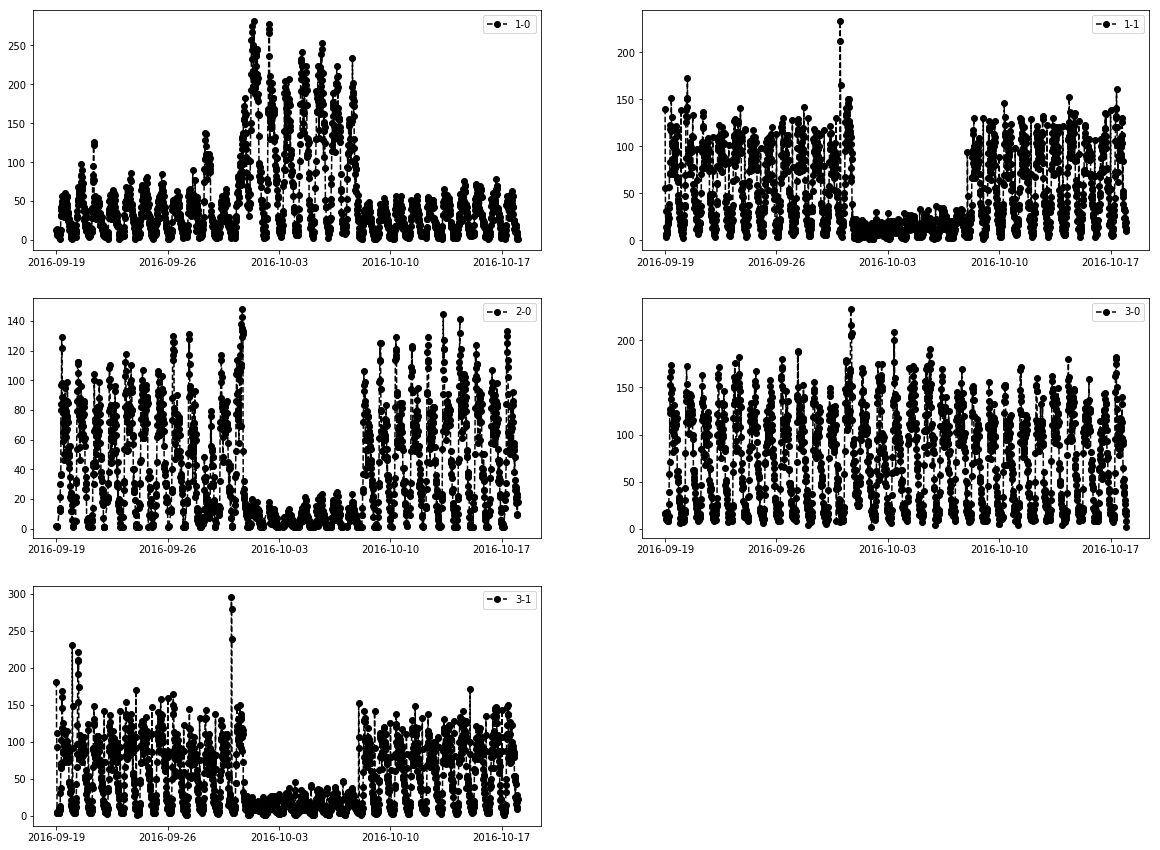

In [21]:
# 平均流量与收费站进出对
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
#xticks = [datetime(2016,7,19,0,0,0),datetime(2016,8,19,0,0,0),datetime(2016,9,19,0,0,0),datetime(2016,10,17,0,0,0)]
for k1, group in grouped_by_pair:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['start_time'],group['volume'],'ko--',label=k1)
    #ax.set_xticks(xticks)
    #ax.set_ylim([0, 1600])
    ax.legend()

### 选取典型样本，观察平均流量随24小时的变化 

In [72]:
holiday_date = ['2016-09-30','2016-10-01','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07','2016-10-08']

In [77]:
index = (process_data2['date']=='2016-09-30') | (process_data2['date']=='2016-10-01') | (process_data2['date']=='2016-10-02') | (process_data2['date']=='2016-10-03') | (process_data2['date']=='2016-10-04') | (process_data2['date']=='2016-10-05') | (process_data2['date']=='2016-10-06') | (process_data2['date']=='2016-10-07') | (process_data2['date']=='2016-10-08') 
holiday_date_sample = process_data2.ix[index,:]

In [78]:
holiday_date_sample

tollgate_id                                time_window  direction  \
3874            3  [2016-09-30 03:00:00,2016-09-30 03:20:00)          0   
3875            3  [2016-09-30 03:00:00,2016-09-30 03:20:00)          1   
3876            1  [2016-09-30 03:00:00,2016-09-30 03:20:00)          0   
3877            1  [2016-09-30 03:00:00,2016-09-30 03:20:00)          1   
3878            1  [2016-09-30 03:20:00,2016-09-30 03:40:00)          0   
3879            1  [2016-09-30 03:20:00,2016-09-30 03:40:00)          1   
3880            3  [2016-09-30 03:20:00,2016-09-30 03:40:00)          0   
3881            3  [2016-09-30 03:20:00,2016-09-30 03:40:00)          1   
3882            1  [2016-09-30 03:40:00,2016-09-30 04:00:00)          0   
3883            1  [2016-09-30 03:40:00,2016-09-30 04:00:00)          1   
3884            3  [2016-09-30 03:40:00,2016-09-30 04:00:00)          0   
3885            3  [2016-09-30 03:40:00,2016-09-30 04:00:00)          1   
3886            1  [2016-09-30 04:00:00,2016-09-30 04:20:00)          0   
3887            1  [2016-09-30 04:00:00,2016-09-30 04:20:00)          1   
3888            3  [2016-09-30 04:00:00,2016-09-30 04:20:00)          0   
3889            3  [2016-09-30 04:00:00,2016-09-30 04:20:00)          1   
3890            3  [2016-09-30 04:20:00,2016-09-30 04:40:00)          0   
3891            3  [2016-09-30 04:20:00,2016-09-30 04:40:00)          1   
3892            1  [2016-09-30 04:20:00,2016-09-30 04:40:00)          0   
3893            1  [2016-09-30 04:20:00,2016-09-30 04:40:00)          1   
3894            1  [2016-09-30 04:40:00,2016-09-30 05:00:00)          0   
3895            1  [2016-09-30 04:40:00,2016-09-30 05:00:00)          1   
3896            3  [2016-09-30 04:40:00,2016-09-30 05:00:00)          0   
3897            3  [2016-09-30 04:40:00,2016-09-30 05:00:00)          1   
3898            1  [2016-09-30 05:00:00,2016-09-30 05:20:00)          0   
3899            1  [2016-09-30 05:00:00,2016-09-30 05:20:00)          1   
3900            3  [2016-09-30 05:00:00,2016-09-30 05:20:00)          0   
3901            3  [2016-09-30 05:00:00,2016-09-30 05:20:00)          1   
3902            2  [2016-09-30 05:00:00,2016-09-30 05:20:00)          0   
3903            2  [2016-09-30 05:20:00,2016-09-30 05:40:00)          0   
...           ...                                        ...        ...   
6878            1  [2016-10-08 21:40:00,2016-10-08 22:00:00)          0   
6879            1  [2016-10-08 21:40:00,2016-10-08 22:00:00)          1   
6880            2  [2016-10-08 21:40:00,2016-10-08 22:00:00)          0   
6881            2  [2016-10-08 22:00:00,2016-10-08 22:20:00)          0   
6882            3  [2016-10-08 22:00:00,2016-10-08 22:20:00)          0   
6883            3  [2016-10-08 22:00:00,2016-10-08 22:20:00)          1   
6884            1  [2016-10-08 22:00:00,2016-10-08 22:20:00)          0   
6885            1  [2016-10-08 22:00:00,2016-10-08 22:20:00)          1   
6886            1  [2016-10-08 22:20:00,2016-10-08 22:40:00)          0   
6887            1  [2016-10-08 22:20:00,2016-10-08 22:40:00)          1   
6888            2  [2016-10-08 22:20:00,2016-10-08 22:40:00)          0   
6889            3  [2016-10-08 22:20:00,2016-10-08 22:40:00)          0   
6890            3  [2016-10-08 22:20:00,2016-10-08 22:40:00)          1   
6891            2  [2016-10-08 22:40:00,2016-10-08 23:00:00)          0   
6892            1  [2016-10-08 22:40:00,2016-10-08 23:00:00)          0   
6893            1  [2016-10-08 22:40:00,2016-10-08 23:00:00)          1   
6894            3  [2016-10-08 22:40:00,2016-10-08 23:00:00)          0   
6895            3  [2016-10-08 22:40:00,2016-10-08 23:00:00)          1   
6896            3  [2016-10-08 23:00:00,2016-10-08 23:20:00)          0   
6897            3  [2016-10-08 23:00:00,2016-10-08 23:20:00)          1   
6898            2  [2016-10-08 23:00:00,2016-10-08 23:20:00)          0   
6899            1  [2016-10-08 

In [79]:
temp_data = holiday_date_sample.ix[:,['pair','start_time','volume']]
holiday_grouped_by_pair = temp_data.groupby('pair')
holiday_grouped_by_pair.size()

pair
1-0    636
1-1    635
2-0    489
3-0    637
3-1    637
dtype: int64

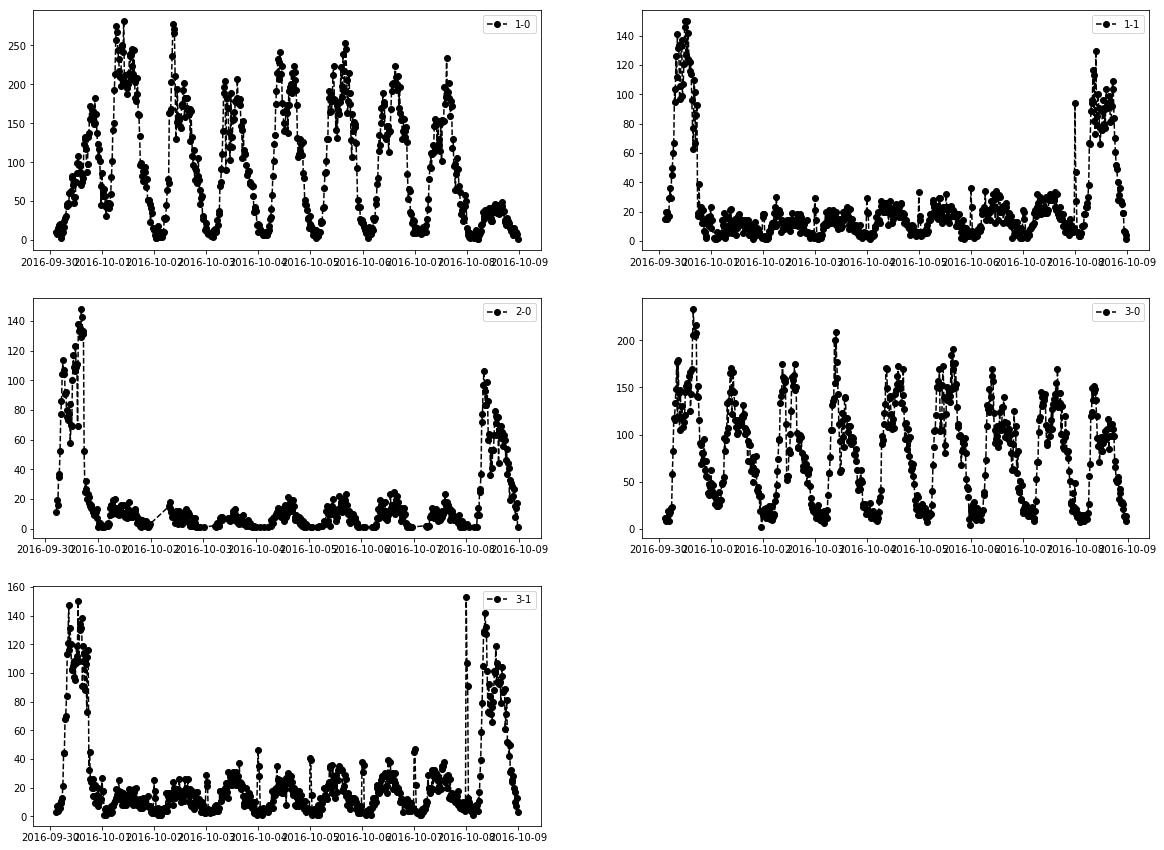

In [80]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
#xticks = [datetime(2016,7,19,0,0,0),datetime(2016,8,19,0,0,0),datetime(2016,9,19,0,0,0),datetime(2016,10,17,0,0,0)]
for k1, group in holiday_grouped_by_pair:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['start_time'],group['volume'],'ko--',label=k1)
    #ax.set_xticks(xticks)
    #ax.set_ylim([0, 1600])
    ax.legend()

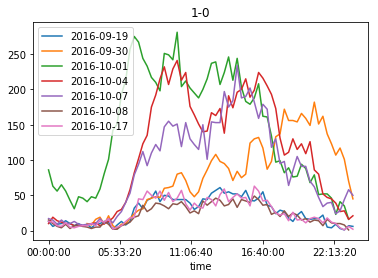

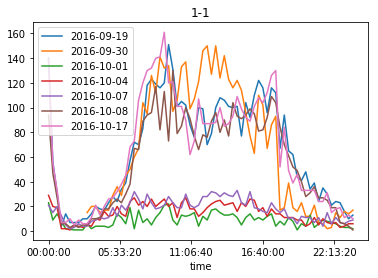

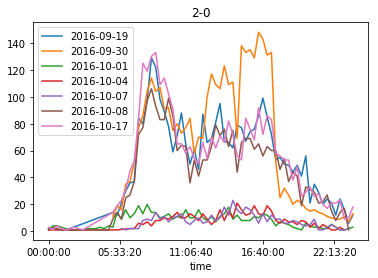

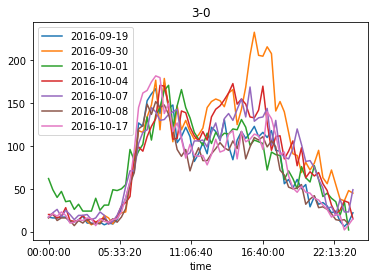

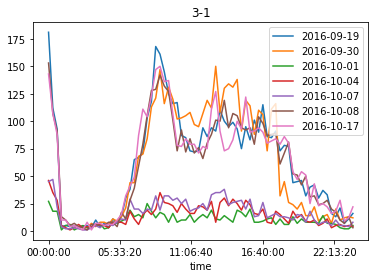

In [93]:
temp_data = process_data2.ix[:,['pair','date','time','volume']]
index = (temp_data['date']=='2016-09-19') | (temp_data['date']=='2016-09-30') | (temp_data['date']=='2016-10-01') | (temp_data['date']=='2016-10-04') | (temp_data['date']=='2016-10-07') | (temp_data['date']=='2016-10-08') | (temp_data['date']=='2016-10-17') 
random_date_sample = temp_data.ix[index,:]
grouped_by_pair = random_date_sample.groupby('pair')
for k,group in grouped_by_pair:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    grouped_by_day = group.groupby('date')
    for k2,group2 in grouped_by_day:
        plt.plot(group2['time'],group2['volume'],label=k2)
        plt.legend()

### 平均时间与天气

In [96]:
temp_data = process_data2.ix[:,['pair','volume','pressure','sea_pressure','wind_direction','wind_speed','temperature','rel_humidity','precipitation']]

In [97]:
temp_data

pair  volume  pressure  sea_pressure  wind_direction  wind_speed  \
0      3-0      17    1008.2        1013.2           329.0         2.8   
1      3-1     181    1008.2        1013.2           329.0         2.8   
2      1-0      13    1008.2        1013.2           329.0         2.8   
3      1-1     140    1008.2        1013.2           329.0         2.8   
4      2-0       2    1008.2        1013.2           329.0         2.8   
5      1-0       6    1008.2        1013.2           329.0         2.8   
6      1-1      56    1008.2        1013.2           329.0         2.8   
7      3-0      16    1008.2        1013.2           329.0         2.8   
8      3-1     112    1008.2        1013.2           329.0         2.8   
9      3-0      16    1008.2        1013.2           329.0         2.8   
10     3-1      93    1008.2        1013.2           329.0         2.8   
11     1-0       9    1008.2        1013.2           329.0         2.8   
12     1-1      31    1008.2        1013.2           329.0         2.8   
13     3-0      17    1008.2        1013.2           329.0         2.8   
14     3-1       4    1008.2        1013.2           329.0         2.8   
15     2-0       1    1008.2        1013.2           329.0         2.8   
16     1-0      10    1008.2        1013.2           329.0         2.8   
17     1-1       4    1008.2        1013.2           329.0         2.8   
18     1-0      14    1008.2        1013.2           329.0         2.8   
19     1-1      14    1008.2        1013.2           329.0         2.8   
20     3-0      17    1008.2        1013.2           329.0         2.8   
21     3-1       5    1008.2        1013.2           329.0         2.8   
22     2-0       2    1008.2        1013.2           329.0         2.8   
23     1-0      10    1008.2        1013.2           329.0         2.8   
24     1-1       7    1008.2        1013.2           329.0         2.8   
25     3-0      11    1008.2        1013.2           329.0         2.8   
26     3-1       4    1008.2        1013.2           329.0         2.8   
27     1-0       7    1008.2        1013.2           329.0         2.8   
28     1-1       7    1008.2        1013.2           329.0         2.8   
29     3-0      11    1008.2        1013.2           329.0         2.8   
...    ...     ...       ...           ...             ...         ...   
10033  3-0      17    1013.9        1018.9           322.0         2.5   
10034  3-1      16    1013.9        1018.9           322.0         2.5   
10035  2-0      21    1013.9        1018.9           322.0         2.5   
10036  1-0      12    1013.9        1018.9           322.0         2.5   
10037  1-1      15    1013.9        1018.9           322.0         2.5   
10038  3-0      20    1013.9        1018.9           322.0         2.5   
10039  3-1      18    1013.9        1018.9           322.0         2.5   
10040  2-0      21    1013.9        1018.9           322.0         2.5   
10041  1-0      10    1013.9        1018.9           322.0         2.5   
10042  1-1      18    1013.9        1018.9           322.0         2.5   
10043  2-0      23    1013.9        1018.9           322.0         2.5   
10044  3-0      19    1013.9        1018.9           322.0         2.5   
10045  3-1      28    1013.9        1018.9           322.0         2.5   
10046  1-0       4    1013.9        1018.9           322.0         2.5   
10047  1-1      19    1013.9        1018.9           322.0         2.5   
10048  2-0       9    1013.9        1018.9           322.0         2.5   
10049  3-0       2    1013.9        1018.9           322.0         2.5   
10050  3-1       9    1013.9        1018.9           322.0         2.5   
10051  1-0       1    1013.9        1018.9           322.0         2.5   
10052  1-1      11    1013.9        1018.9           322.0         2.5   
10053  3-0       8    1013.9        1018.9           322.0         2.5   
10054  3-1      12    1013.9        1018.9           322.0         2.5   
10055  2-0

In [98]:
grouped_by_pair = temp_data.groupby('pair')
grouped_by_pair.size()

pair
1-0    2084
1-1    2084
2-0    1724
3-0    2086
3-1    2085
dtype: int64

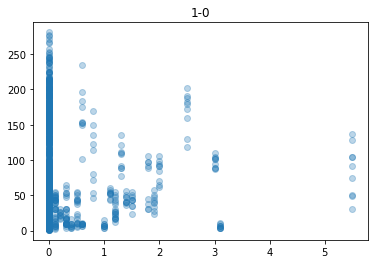

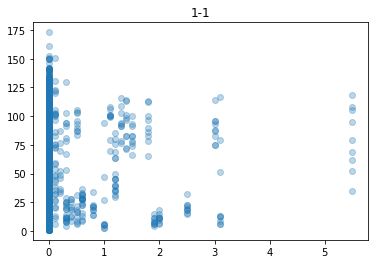

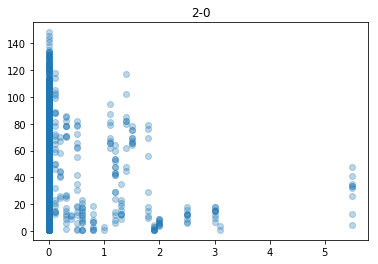

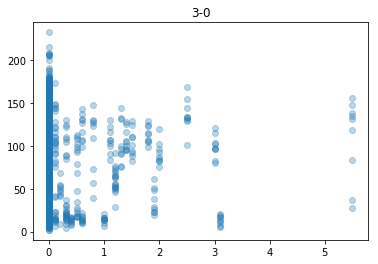

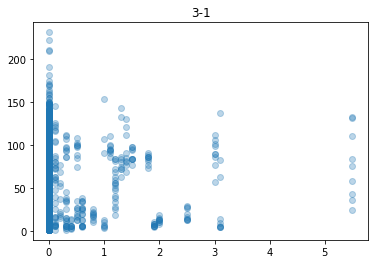

In [99]:
# 平均流量与降水量
for k, group in grouped_by_pair:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['precipitation'],group['volume'],alpha=0.3)

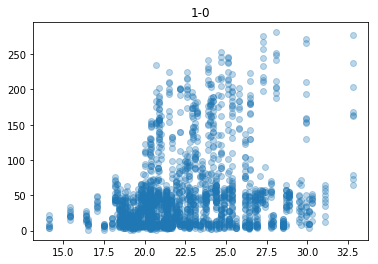

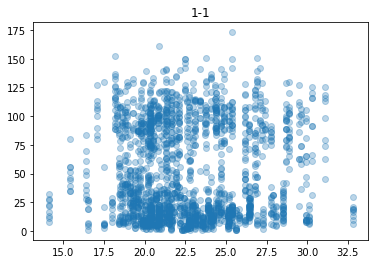

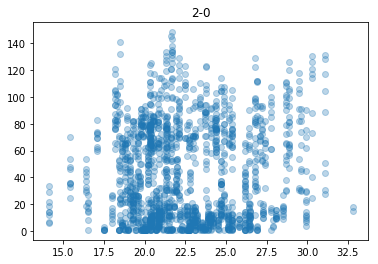

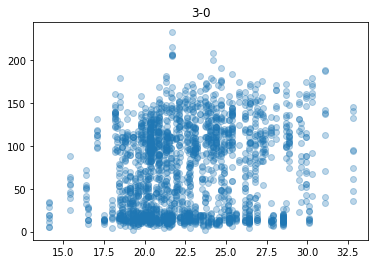

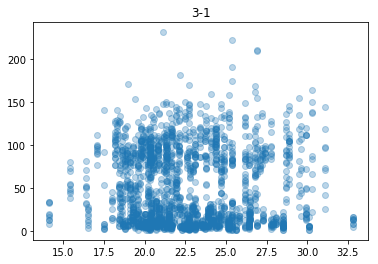

In [100]:
# 平均流量与温度
for k, group in grouped_by_pair:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(k)
    plt.scatter(group['temperature'],group['volume'],alpha=0.3)

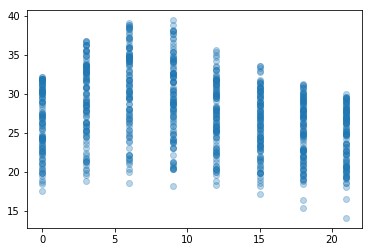

In [120]:
# 气温和时间的关系
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/result/weather (table 7)_training_update.csv'
weather_data2 = pd.read_csv(in_file_path)
temp_time_data = weather_data2.ix[:,['hour','temperature']]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(temp_time_data['hour'], temp_time_data['temperature'], alpha=0.3)

In [124]:
peocess_data

NameError: name 'peocess_data' is not defined

In [125]:
process_data

intersection_id  tollgate_id                                time_window  \
0                   A            2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   A            2  [2016-07-19 01:20:00,2016-07-19 01:40:00)   
2                   A            2  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3                   A            2  [2016-07-19 02:20:00,2016-07-19 02:40:00)   
4                   A            2  [2016-07-19 02:40:00,2016-07-19 03:00:00)   
5                   A            2  [2016-07-19 03:20:00,2016-07-19 03:40:00)   
6                   A            2  [2016-07-19 03:40:00,2016-07-19 04:00:00)   
7                   A            2  [2016-07-19 04:00:00,2016-07-19 04:20:00)   
8                   A            2  [2016-07-19 04:20:00,2016-07-19 04:40:00)   
9                   A            2  [2016-07-19 04:40:00,2016-07-19 05:00:00)   
10                  A            2  [2016-07-19 05:00:00,2016-07-19 05:20:00)   
11                  A            2  [2016-07-19 05:20:00,2016-07-19 05:40:00)   
12                  A            2  [2016-07-19 05:40:00,2016-07-19 06:00:00)   
13                  A            2  [2016-07-19 06:00:00,2016-07-19 06:20:00)   
14                  A            2  [2016-07-19 06:20:00,2016-07-19 06:40:00)   
15                  A            2  [2016-07-19 06:40:00,2016-07-19 07:00:00)   
16                  A            2  [2016-07-19 07:00:00,2016-07-19 07:20:00)   
17                  A            2  [2016-07-19 07:20:00,2016-07-19 07:40:00)   
18                  A            2  [2016-07-19 07:40:00,2016-07-19 08:00:00)   
19                  A            2  [2016-07-19 08:00:00,2016-07-19 08:20:00)   
20                  A            2  [2016-07-19 08:20:00,2016-07-19 08:40:00)   
21                  A            2  [2016-07-19 08:40:00,2016-07-19 09:00:00)   
22                  A            2  [2016-07-19 09:00:00,2016-07-19 09:20:00)   
23                  A            2  [2016-07-19 09:20:00,2016-07-19 09:40:00)   
24                  A            2  [2016-07-19 09:40:00,2016-07-19 10:00:00)   
25                  A            2  [2016-07-19 10:00:00,2016-07-19 10:20:00)   
26                  A            2  [2016-07-19 10:20:00,2016-07-19 10:40:00)   
27                  A            2  [2016-07-19 10:40:00,2016-07-19 11:00:00)   
28                  A            2  [2016-07-19 11:00:00,2016-07-19 11:20:00)   
29                  A            2  [2016-07-19 11:20:00,2016-07-19 11:40:00)   
...               ...          ...                                        ...   
25114               C            3  [2016-10-16 21:00:00,2016-10-16 21:20:00)   
25115               C            3  [2016-10-16 22:20:00,2016-10-16 22:40:00)   
25116               C            3  [2016-10-16 23:00:00,2016-10-16 23:20:00)   
25117               C            3  [2016-10-17 00:20:00,2016-10-17 00:40:00)   
25118               C            3  [2016-10-17 08:40:00,2016-10-17 09:00:00)   
25119               C            3  [2016-10-17 09:40:00,2016-10-17 10:00:00)   
25120               C            3  [2016-10-17 10:00:00,2016-10-17 10:20:00)   
25121               C            3  [2016-10-17 10:40:00,2016-10-17 11:00:00)   
25122               C            3  [2016-10-17 12:00:00,2016-10-17 12:20:00)   
25123               C            3  [2016-10-17 12:20:00,2016-10-17 12:40:00)   
25124               C            3  [2016-10-17 12:40:00,2016-10-17 13:00:00)   
25125               C            3  [2016-10-17 13:20:00,2016-10-17 13:40:00)   
25126               C            3  [2016-10-17 13:40:00,2016-10-17 14:00:00)   
25127               C            3  [2016-10-17 14:20:00,2016-10-17 14:40:00)   
25128               C            3  [2016-10-17 14:40:00,2016-10-17 15:00:00)   
25129               C            3  [2016-10-17 15:00:00,2016-10-17 15:20:00)   
25130               C            3  [2016-10-17 16:00:00,2016-10-17 16:20:00)   
25131               C            3  [

### 测试集分析

In [22]:
# 读入平均时间，流量和天气数据（平均时间和流量由aggregate_travel_time.py和aggregate_volume.py生成）
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/test1_20min_avg_travel_time.csv'
test1 = pd.read_csv(in_file_path)
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/test1_20min_avg_volume.csv'
test2 = pd.read_csv(in_file_path)
in_file_path = '/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/weather (table 7)_test1.csv'
weather_data = pd.read_csv(in_file_path)

In [26]:
weather_data.columns

Index(['date', 'hour', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation'],
      dtype='object')

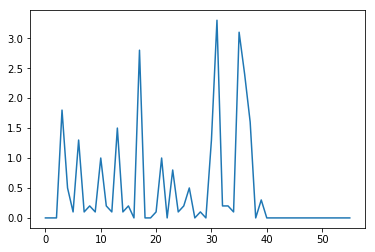

In [32]:
# 天气
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(weather_data['precipitation'])),weather_data['precipitation'])

In [34]:
test1.columns

Index(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time'], dtype='object')

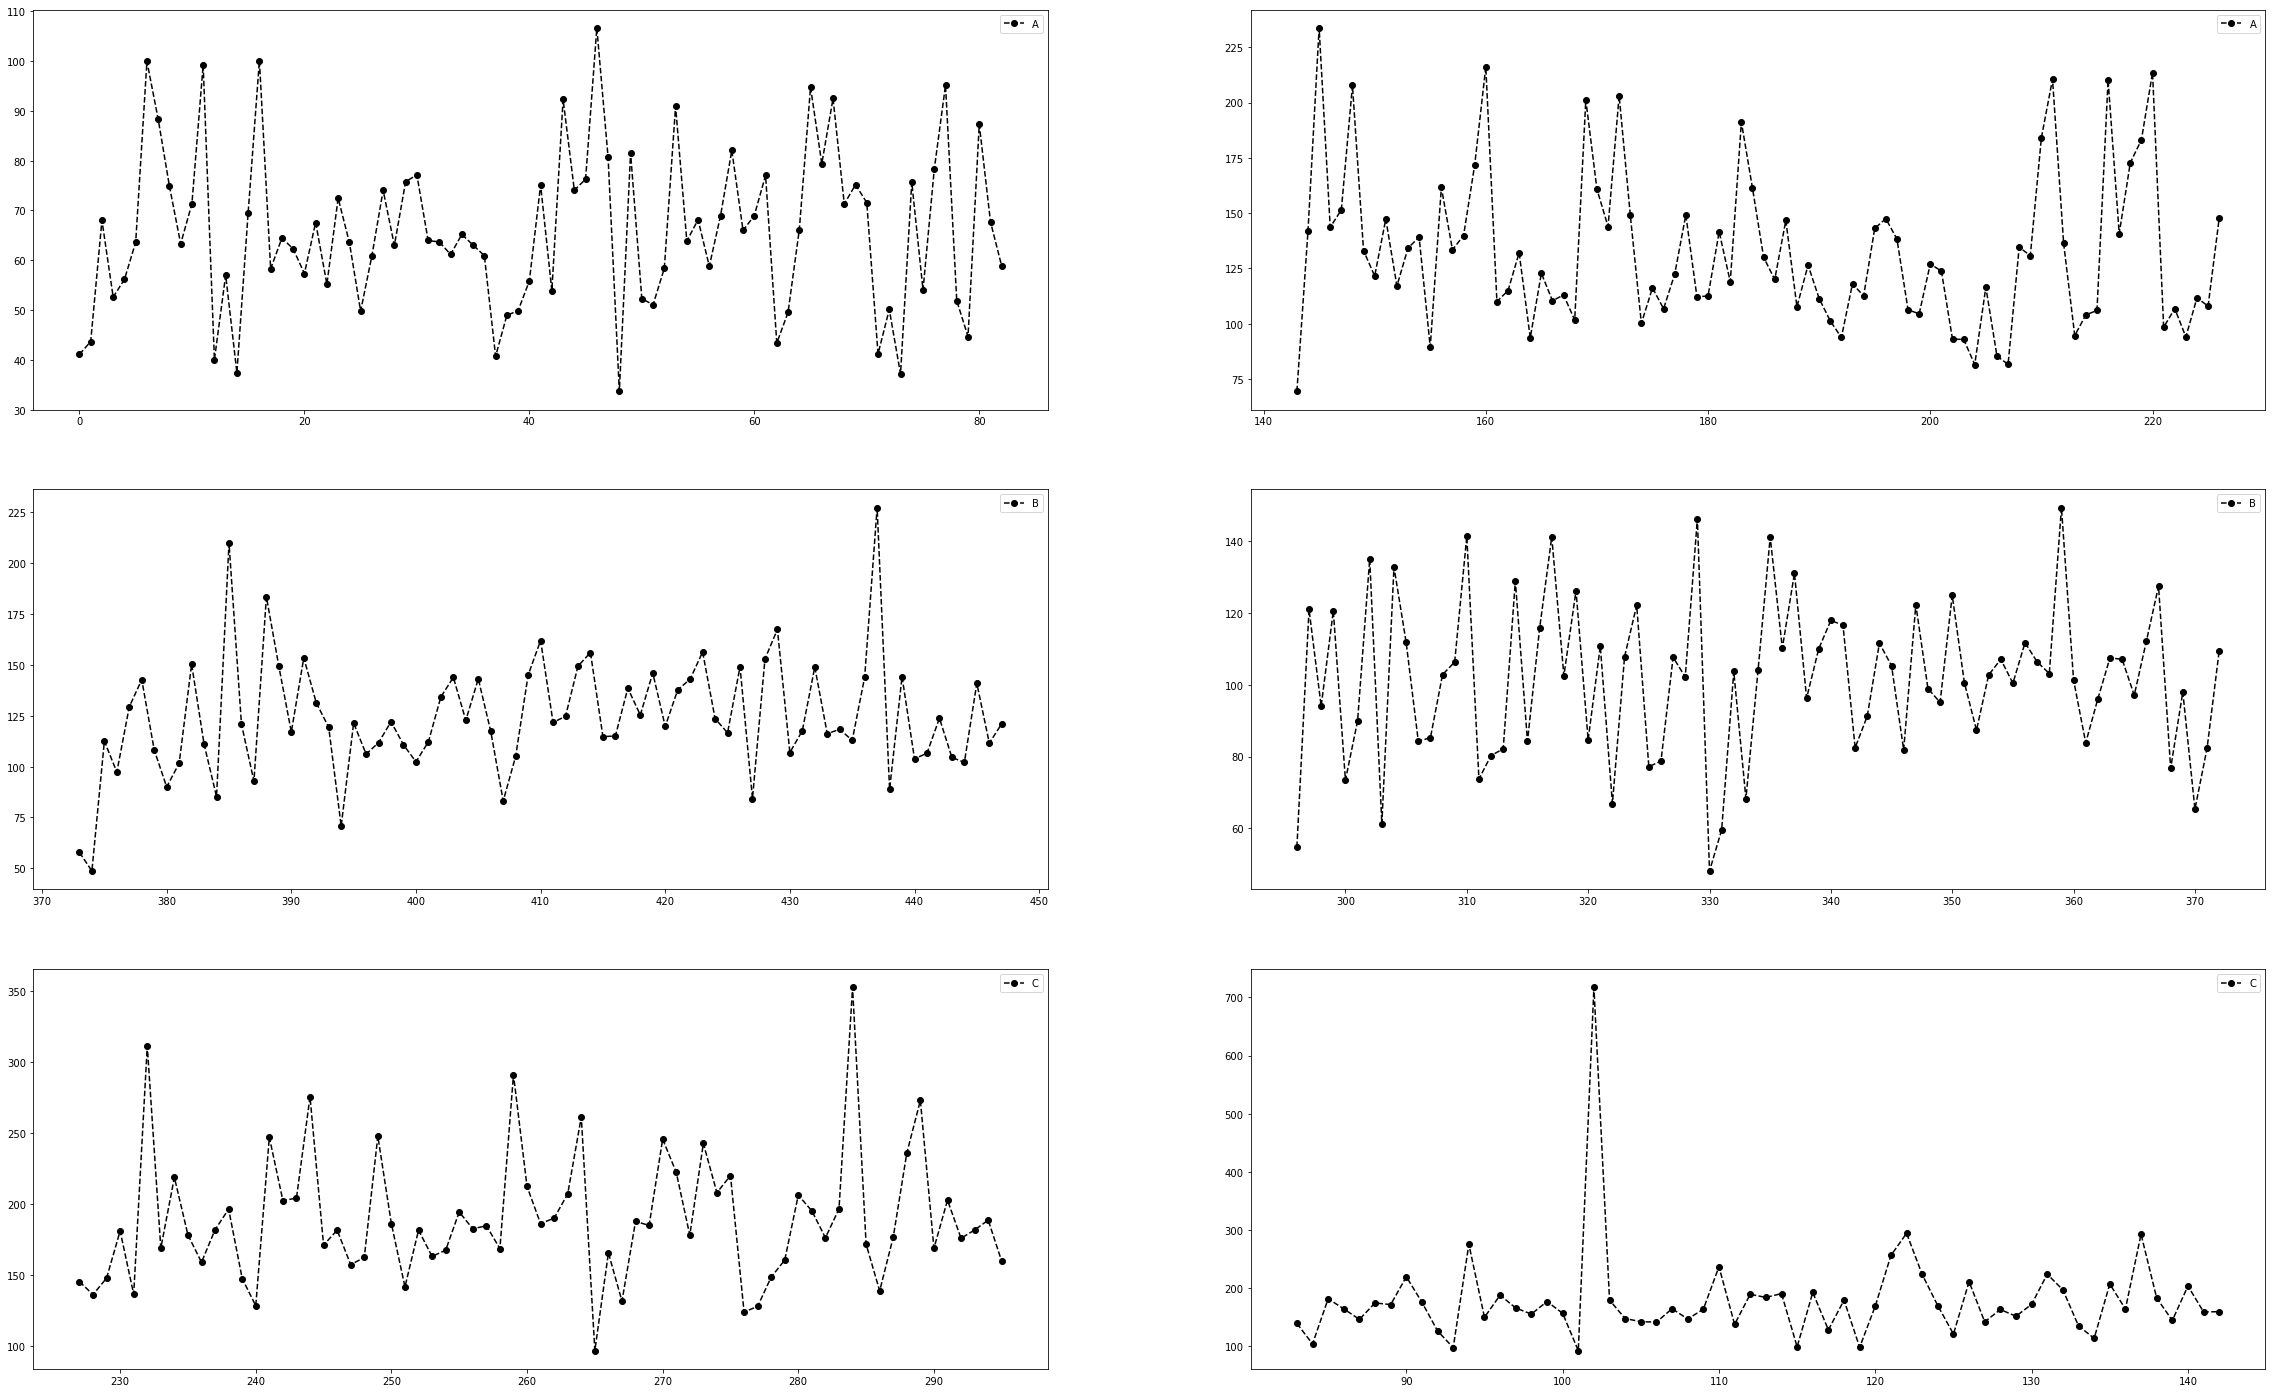

In [39]:
# 平均时间
grouped_by_route = test1.groupby(['intersection_id', 'tollgate_id'])
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(40)
k = 1
for (k1,k2), group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['avg_travel_time'],'ko--',label=k1)
    ax.legend()

In [40]:
test2.columns

Index(['tollgate_id', 'time_window', 'direction', 'volume', 'etc'], dtype='object')

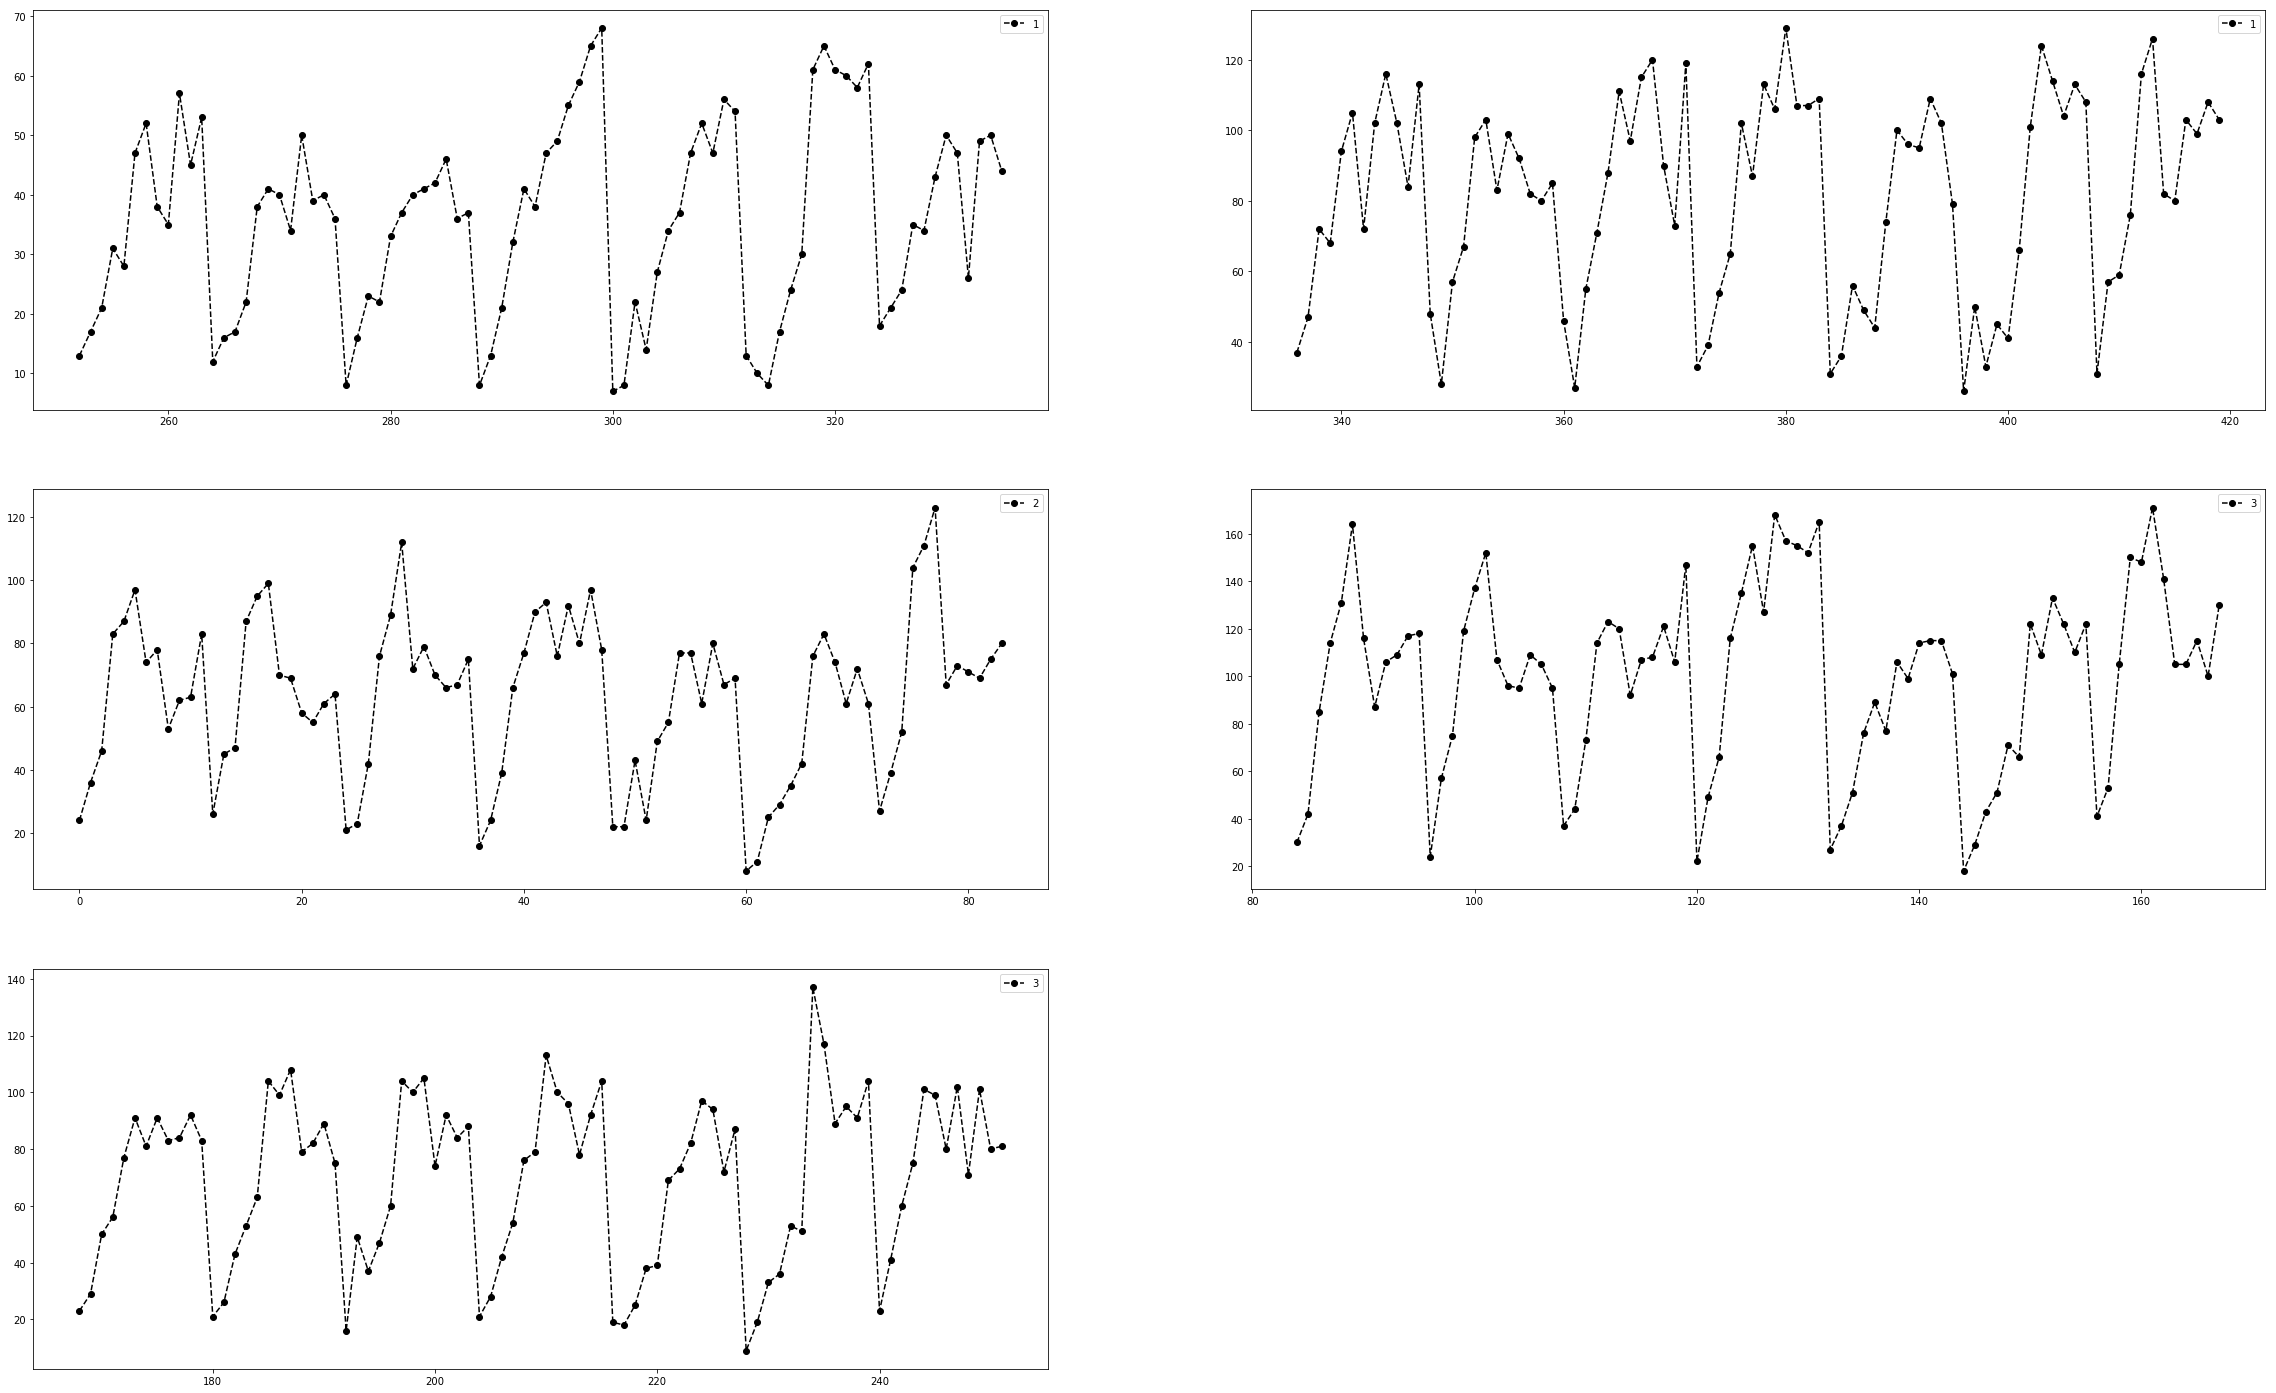

In [41]:
# 流量
grouped_by_route = test2.groupby(['tollgate_id', 'direction'])
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(40)
k = 1
for (k1,k2), group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['volume'],'ko--',label=k1)
    ax.legend()